In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing method
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import itertools
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults

In [10]:
coke=pd.read_excel("../Assignment 18-Forecasting/CocaCola_Sales_Rawdata.xlsx",
                    index_col=0, 
                    parse_dates=True)
coke.head()

Sales
Quarter             
Q1_86    1734.827000
Q2_86    2244.960999
Q3_86    2533.804993
Q4_86    2154.962997
Q1_87    1547.818996

In [11]:
coke.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, Q1_86 to Q2_96
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   42 non-null     float64
dtypes: float64(1)
memory usage: 672.0+ bytes


In [12]:
coke.index

Index(['Q1_86', 'Q2_86', 'Q3_86', 'Q4_86', 'Q1_87', 'Q2_87', 'Q3_87', 'Q4_87',
       'Q1_88', 'Q2_88', 'Q3_88', 'Q4_88', 'Q1_89', 'Q2_89', 'Q3_89', 'Q4_89',
       'Q1_90', 'Q2_90', 'Q3_90', 'Q4_90', 'Q1_91', 'Q2_91', 'Q3_91', 'Q4_91',
       'Q1_92', 'Q2_92', 'Q3_92', 'Q4_92', 'Q1_93', 'Q2_93', 'Q3_93', 'Q4_93',
       'Q1_94', 'Q2_94', 'Q3_94', 'Q4_94', 'Q1_95', 'Q2_95', 'Q3_95', 'Q4_95',
       'Q1_96', 'Q2_96'],
      dtype='object', name='Quarter')

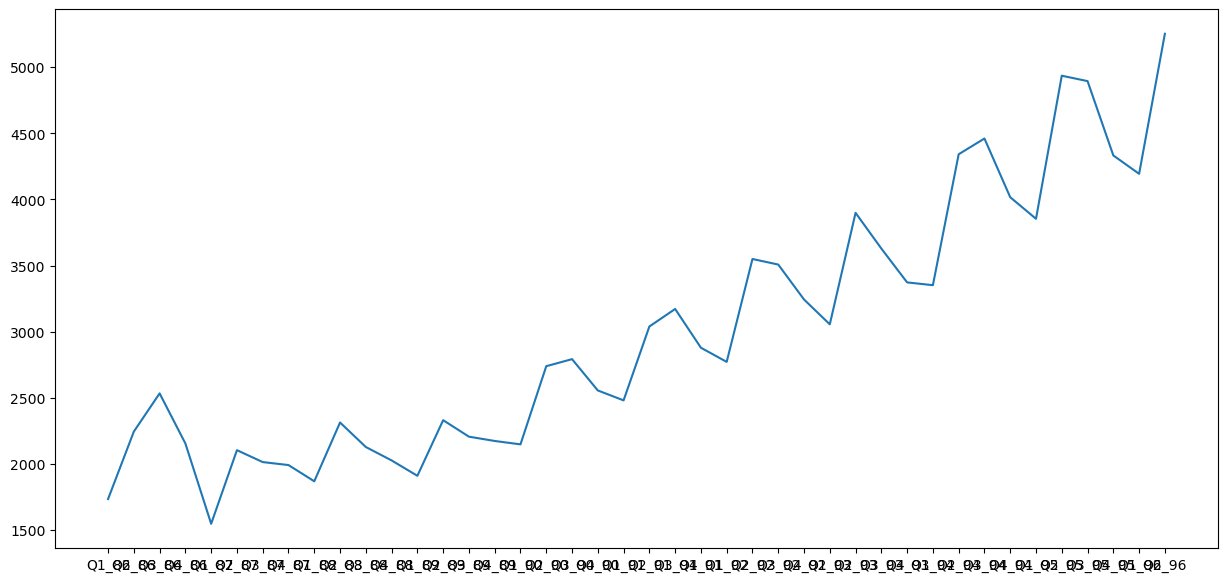

In [13]:
plt.figure(figsize = (15,7))
plt.plot(coke)
plt.show()

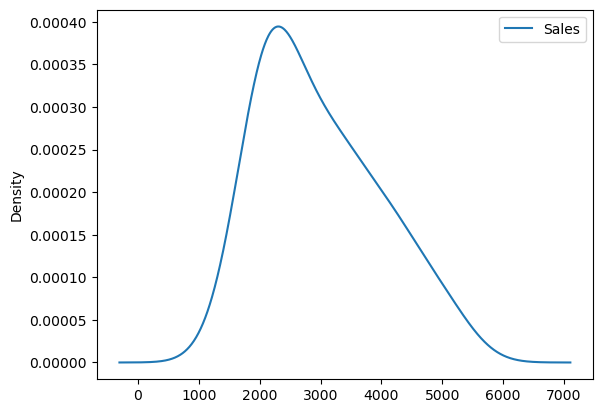

In [14]:
# create a density plot
coke.plot(kind='kde')
plt.show()

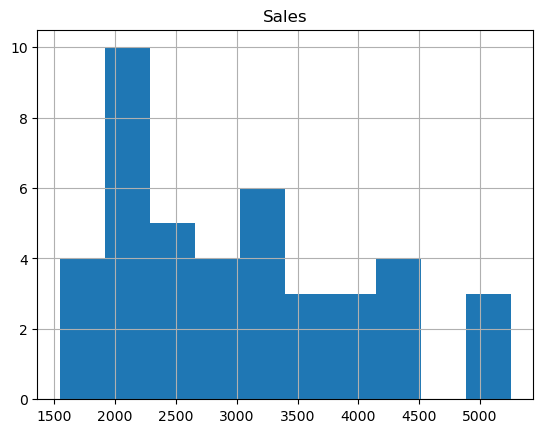

In [15]:
# create a histogram plot
coke.hist()
plt.show()

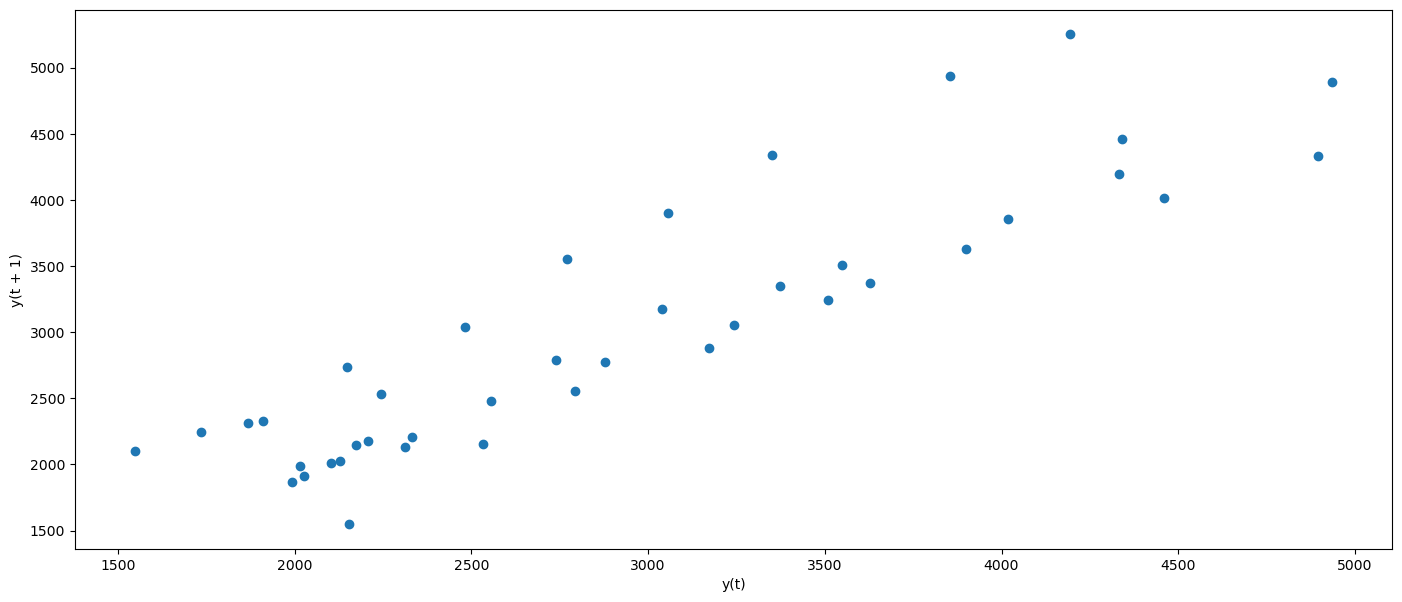

In [16]:
# create a scatter plot
plt.figure(figsize = (17,7))
pd.plotting.lag_plot(coke)
plt.show()

<Figure size 5000x1500 with 0 Axes>

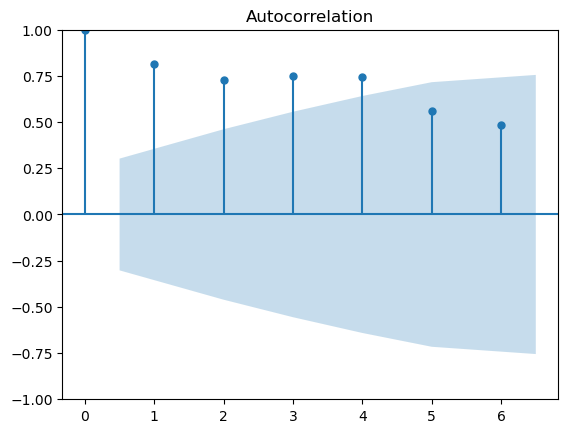

In [17]:
# create an autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize = (50,15))
plot_acf(coke, lags=6)
plt.show()

In [18]:
coke = pd.read_excel("../Assignment 18-Forecasting/CocaCola_Sales_Rawdata.xlsx",
                     index_col = 0,
                     header = 0,
                     parse_dates = True)

In [19]:
coke = coke.squeeze()

In [20]:
type(coke)

pandas.core.series.Series

In [21]:
coke.shape

(42,)

In [22]:
coke = pd.read_excel("../Assignment 18-Forecasting/CocaCola_Sales_Rawdata.xlsx")

In [23]:
quarter =['Q1','Q2','Q3','Q4']

In [24]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [25]:
coke['quarter']= 0

for i in range(42):
    p = coke["Quarter"][i]
    coke['quarter'][i]= coke["Quarter"][i][0:2]

coke

Quarter        Sales quarter
0    Q1_86  1734.827000      Q1
1    Q2_86  2244.960999      Q2
2    Q3_86  2533.804993      Q3
3    Q4_86  2154.962997      Q4
4    Q1_87  1547.818996      Q1
5    Q2_87  2104.411995      Q2
6    Q3_87  2014.362999      Q3
7    Q4_87  1991.746998      Q4
8    Q1_88  1869.049999      Q1
9    Q2_88  2313.631996      Q2
10   Q3_88  2128.320000      Q3
11   Q4_88  2026.828999      Q4
12   Q1_89  1910.603996      Q1
13   Q2_89  2331.164993      Q2
14   Q3_89  2206.549995      Q3
15   Q4_89  2173.967995      Q4
16   Q1_90  2148.278000      Q1
17   Q2_90  2739.307999      Q2
18   Q3_90  2792.753998      Q3
19   Q4_90  2556.009995      Q4
20   Q1_91  2480.973999      Q1
21   Q2_91  3039.522995      Q2
22   Q3_91  3172.115997      Q3
23   Q4_91  2879.000999      Q4
24   Q1_92  2772.000000      Q1
25   Q2_92  3550.000000      Q2
26   Q3_92  3508.000000      Q3
27   Q4_92  3243.859993      Q4
28   Q1_93  3056.000000      Q1
29   Q2_93  3899.000000      Q2
30   Q3_93  3629.000000      Q3
31   Q4_93  3373.000000      Q4
32   Q1_94  3352.000000      Q1
33   Q2_94  4342.000000      Q2
34   Q3_94  4461.000000      Q3
35   Q4_94  4017.000000      Q4
36   Q1_95  3854.000000      Q1
37   Q2_95  4936.000000      Q2
38   Q3_95  4895.000000      Q3
39   Q4_95  4333.000000      Q4
40   Q1_96  4194.000000      Q1
41   Q2_96  5253.000000      Q2

In [26]:
import pandas as pd

# 'quarter_dummies' contains dummy variables created by pd.get_dummies()
quarter_dummies = pd.DataFrame(pd.get_dummies(coke['quarter']))

# Convert to boolean type (True/False)
quarter_dummies_bool = quarter_dummies.astype(bool)

# Display the DataFrame with boolean type
quarter_dummies_bool

Q1     Q2     Q3     Q4
0    True  False  False  False
1   False   True  False  False
2   False  False   True  False
3   False  False  False   True
4    True  False  False  False
5   False   True  False  False
6   False  False   True  False
7   False  False  False   True
8    True  False  False  False
9   False   True  False  False
10  False  False   True  False
11  False  False  False   True
12   True  False  False  False
13  False   True  False  False
14  False  False   True  False
15  False  False  False   True
16   True  False  False  False
17  False   True  False  False
18  False  False   True  False
19  False  False  False   True
20   True  False  False  False
21  False   True  False  False
22  False  False   True  False
23  False  False  False   True
24   True  False  False  False
25  False   True  False  False
26  False  False   True  False
27  False  False  False   True
28   True  False  False  False
29  False   True  False  False
30  False  False   True  False
31  False  False  False   True
32   True  False  False  False
33  False   True  False  False
34  False  False   True  False
35  False  False  False   True
36   True  False  False  False
37  False   True  False  False
38  False  False   True  False
39  False  False  False   True
40   True  False  False  False
41  False   True  False  False

In [27]:
coke=pd.concat([coke,quarter_dummies_bool],axis=1)
coke

Quarter        Sales quarter     Q1     Q2     Q3     Q4
0    Q1_86  1734.827000      Q1   True  False  False  False
1    Q2_86  2244.960999      Q2  False   True  False  False
2    Q3_86  2533.804993      Q3  False  False   True  False
3    Q4_86  2154.962997      Q4  False  False  False   True
4    Q1_87  1547.818996      Q1   True  False  False  False
5    Q2_87  2104.411995      Q2  False   True  False  False
6    Q3_87  2014.362999      Q3  False  False   True  False
7    Q4_87  1991.746998      Q4  False  False  False   True
8    Q1_88  1869.049999      Q1   True  False  False  False
9    Q2_88  2313.631996      Q2  False   True  False  False
10   Q3_88  2128.320000      Q3  False  False   True  False
11   Q4_88  2026.828999      Q4  False  False  False   True
12   Q1_89  1910.603996      Q1   True  False  False  False
13   Q2_89  2331.164993      Q2  False   True  False  False
14   Q3_89  2206.549995      Q3  False  False   True  False
15   Q4_89  2173.967995      Q4  False  False  False   True
16   Q1_90  2148.278000      Q1   True  False  False  False
17   Q2_90  2739.307999      Q2  False   True  False  False
18   Q3_90  2792.753998      Q3  False  False   True  False
19   Q4_90  2556.009995      Q4  False  False  False   True
20   Q1_91  2480.973999      Q1   True  False  False  False
21   Q2_91  3039.522995      Q2  False   True  False  False
22   Q3_91  3172.115997      Q3  False  False   True  False
23   Q4_91  2879.000999      Q4  False  False  False   True
24   Q1_92  2772.000000      Q1   True  False  False  False
25   Q2_92  3550.000000      Q2  False   True  False  False
26   Q3_92  3508.000000      Q3  False  False   True  False
27   Q4_92  3243.859993      Q4  False  False  False   True
28   Q1_93  3056.000000      Q1   True  False  False  False
29   Q2_93  3899.000000      Q2  False   True  False  False
30   Q3_93  3629.000000      Q3  False  False   True  False
31   Q4_93  3373.000000      Q4  False  False  False   True
32   Q1_94  3352.000000      Q1   True  False  False  False
33   Q2_94  4342.000000      Q2  False   True  False  False
34   Q3_94  4461.000000      Q3  False  False   True  False
35   Q4_94  4017.000000      Q4  False  False  False   True
36   Q1_95  3854.000000      Q1   True  False  False  False
37   Q2_95  4936.000000      Q2  False   True  False  False
38   Q3_95  4895.000000      Q3  False  False   True  False
39   Q4_95  4333.000000      Q4  False  False  False   True
40   Q1_96  4194.000000      Q1   True  False  False  False
41   Q2_96  5253.000000      Q2  False   True  False  False

In [28]:
# Complete the dataset
coke['t']=np.arange(1,43)
coke['t_square']=np.square(coke.t)
coke['log_Sales']=np.log(coke.Sales)
coke

Quarter        Sales quarter     Q1     Q2     Q3     Q4   t  t_square  \
0    Q1_86  1734.827000      Q1   True  False  False  False   1         1   
1    Q2_86  2244.960999      Q2  False   True  False  False   2         4   
2    Q3_86  2533.804993      Q3  False  False   True  False   3         9   
3    Q4_86  2154.962997      Q4  False  False  False   True   4        16   
4    Q1_87  1547.818996      Q1   True  False  False  False   5        25   
5    Q2_87  2104.411995      Q2  False   True  False  False   6        36   
6    Q3_87  2014.362999      Q3  False  False   True  False   7        49   
7    Q4_87  1991.746998      Q4  False  False  False   True   8        64   
8    Q1_88  1869.049999      Q1   True  False  False  False   9        81   
9    Q2_88  2313.631996      Q2  False   True  False  False  10       100   
10   Q3_88  2128.320000      Q3  False  False   True  False  11       121   
11   Q4_88  2026.828999      Q4  False  False  False   True  12       144   
12   Q1_89  1910.603996      Q1   True  False  False  False  13       169   
13   Q2_89  2331.164993      Q2  False   True  False  False  14       196   
14   Q3_89  2206.549995      Q3  False  False   True  False  15       225   
15   Q4_89  2173.967995      Q4  False  False  False   True  16       256   
16   Q1_90  2148.278000      Q1   True  False  False  False  17       289   
17   Q2_90  2739.307999      Q2  False   True  False  False  18       324   
18   Q3_90  2792.753998      Q3  False  False   True  False  19       361   
19   Q4_90  2556.009995      Q4  False  False  False   True  20       400   
20   Q1_91  2480.973999      Q1   True  False  False  False  21       441   
21   Q2_91  3039.522995      Q2  False   True  False  False  22       484   
22   Q3_91  3172.115997      Q3  False  False   True  False  23       529   
23   Q4_91  2879.000999      Q4  False  False  False   True  24       576   
24   Q1_92  2772.000000      Q1   True  False  False  False  25       625   
25   Q2_92  3550.000000      Q2  False   True  False  False  26       676   
26   Q3_92  3508.000000      Q3  False  False   True  False  27       729   
27   Q4_92  3243.859993      Q4  False  False  False   True  28       784   
28   Q1_93  3056.000000      Q1   True  False  False  False  29       841   
29   Q2_93  3899.000000      Q2  False   True  False  False  30       900   
30   Q3_93  3629.000000      Q3  False  False   True  False  31       961   
31   Q4_93  3373.000000      Q4  False  False  False   True  32      1024   
32   Q1_94  3352.000000      Q1   True  False  False  False  33      1089   
33   Q2_94  4342.000000      Q2  False   True  False  False  34      1156   
34   Q3_94  4461.000000      Q3  False  False   True  False  35      1225   
35   Q4_94  4017.000000      Q4  False  False  False   True  36      1296   
36   Q1_95  3854.000000      Q1   True  False  False  False  37      1369   
37   Q2_95  4936.000000      Q2  False   True  False  False  38      1444   
38   Q3_95  4895.000000      Q3  False  False   True  False  39      1521   
39   Q4_95  4333.000000      Q4  False  False  False   True  40      1600   
40   Q1_96  4194.000000      Q1   True  False  False  False  41      1681   
41   Q2_96  5253.000000      Q2  False   True  False  False  42      1764   

    log_Sales  
0    7.458663  
1    7.716443  
2    7.837477  
3    7.675529  
4    7.344602  
5    7.651791  
6    7.608058  
7    7.596767  
8    7.533186  
9    7.746574  
10   7.663088  
11   7.614228  
12   7.555175  
13   7.754123  
14   7.699185  
15   7.684309  
16   7.672422  
17   7.915461  
18   7.934783  
19   7.846203  
20   7.816407  
21   8.019456  
22   8.062154  
23   7.965199  
24   7.927324  
25   8.174703  
26   8.162801  
27   8.084519  
28   8.024862  
29   8.268475  
30   8.196712  
31   8.123558  
32   8.117312  
33   8.376090  
34   8.403128  
35   8.298291  
36   8.256867  
37   8.504311  
38   8.495970  
39   8.374015  
40   8.341410  
41   8.566555

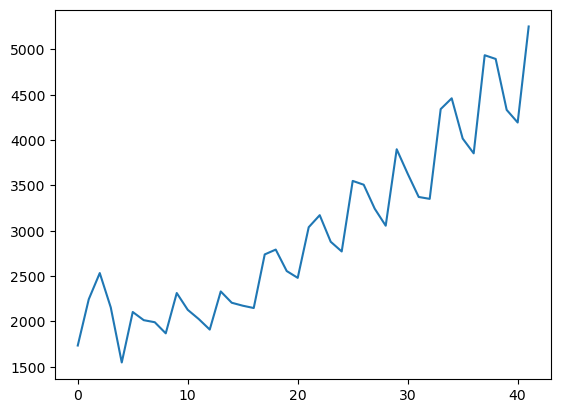

In [25]:
coke['Sales'].plot()
plt.show()

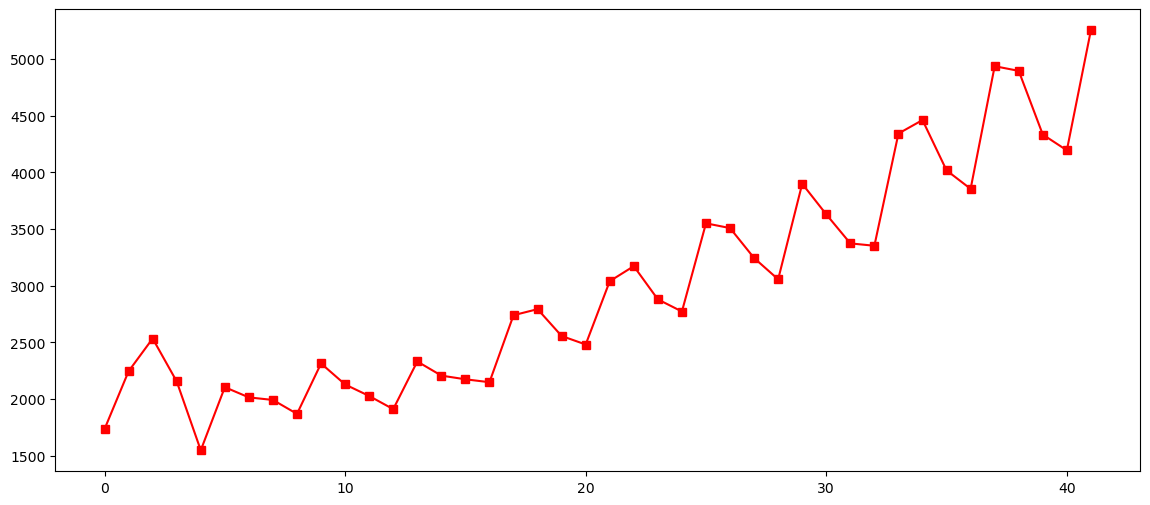

In [29]:
coke['Sales'].plot(figsize=(14,6), color='red', marker='s')
plt.show()

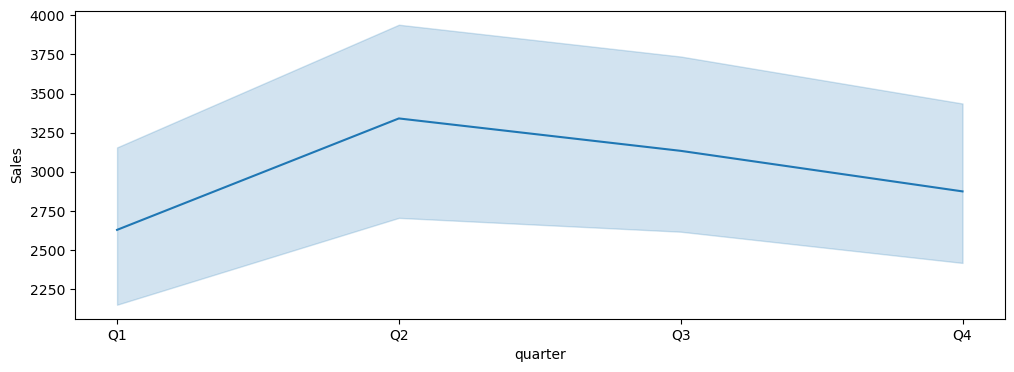

In [30]:
plt.figure(figsize=(12,4))
sns.lineplot(x="quarter",y="Sales",data=coke)
plt.show()

In [31]:
# For self understanding of forecasting values data split into multiples of 12
Train = coke.head(25)
Test = coke.tail(7)

In [31]:
Train

Quarter        Sales quarter     Q1     Q2     Q3     Q4   t  t_square  \
0    Q1_86  1734.827000      Q1   True  False  False  False   1         1   
1    Q2_86  2244.960999      Q2  False   True  False  False   2         4   
2    Q3_86  2533.804993      Q3  False  False   True  False   3         9   
3    Q4_86  2154.962997      Q4  False  False  False   True   4        16   
4    Q1_87  1547.818996      Q1   True  False  False  False   5        25   
5    Q2_87  2104.411995      Q2  False   True  False  False   6        36   
6    Q3_87  2014.362999      Q3  False  False   True  False   7        49   
7    Q4_87  1991.746998      Q4  False  False  False   True   8        64   
8    Q1_88  1869.049999      Q1   True  False  False  False   9        81   
9    Q2_88  2313.631996      Q2  False   True  False  False  10       100   
10   Q3_88  2128.320000      Q3  False  False   True  False  11       121   
11   Q4_88  2026.828999      Q4  False  False  False   True  12       144   
12   Q1_89  1910.603996      Q1   True  False  False  False  13       169   
13   Q2_89  2331.164993      Q2  False   True  False  False  14       196   
14   Q3_89  2206.549995      Q3  False  False   True  False  15       225   
15   Q4_89  2173.967995      Q4  False  False  False   True  16       256   
16   Q1_90  2148.278000      Q1   True  False  False  False  17       289   
17   Q2_90  2739.307999      Q2  False   True  False  False  18       324   
18   Q3_90  2792.753998      Q3  False  False   True  False  19       361   
19   Q4_90  2556.009995      Q4  False  False  False   True  20       400   
20   Q1_91  2480.973999      Q1   True  False  False  False  21       441   
21   Q2_91  3039.522995      Q2  False   True  False  False  22       484   
22   Q3_91  3172.115997      Q3  False  False   True  False  23       529   
23   Q4_91  2879.000999      Q4  False  False  False   True  24       576   
24   Q1_92  2772.000000      Q1   True  False  False  False  25       625   

    log_Sales  
0    7.458663  
1    7.716443  
2    7.837477  
3    7.675529  
4    7.344602  
5    7.651791  
6    7.608058  
7    7.596767  
8    7.533186  
9    7.746574  
10   7.663088  
11   7.614228  
12   7.555175  
13   7.754123  
14   7.699185  
15   7.684309  
16   7.672422  
17   7.915461  
18   7.934783  
19   7.846203  
20   7.816407  
21   8.019456  
22   8.062154  
23   7.965199  
24   7.927324

In [32]:
Test

Quarter   Sales quarter     Q1     Q2     Q3     Q4   t  t_square  \
35   Q4_94  4017.0      Q4  False  False  False   True  36      1296   
36   Q1_95  3854.0      Q1   True  False  False  False  37      1369   
37   Q2_95  4936.0      Q2  False   True  False  False  38      1444   
38   Q3_95  4895.0      Q3  False  False   True  False  39      1521   
39   Q4_95  4333.0      Q4  False  False  False   True  40      1600   
40   Q1_96  4194.0      Q1   True  False  False  False  41      1681   
41   Q2_96  5253.0      Q2  False   True  False  False  42      1764   

    log_Sales  
35   8.298291  
36   8.256867  
37   8.504311  
38   8.495970  
39   8.374015  
40   8.341410  
41   8.566555

In [33]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear

1191.9149910119415

In [34]:
#Exponential
Exp = smf.ols('log_Sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

985.8997545307235

In [35]:
#Quadratic 
Quad = smf.ols('Sales~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

825.0423176018951

In [36]:
#Additive seasonality 
add_sea = smf.ols('Sales~Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Q1', 'Q2', 'Q3', 'Q4']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

2223.0393341466033

In [37]:
#Additive Seasonality Quadratic 
add_sea_Quad = smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Q1', 'Q2', 'Q3', 'Q4','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

1167.8830159280208

In [38]:
##Multiplicative Seasonality
Mul_sea = smf.ols('log_Sales~Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

2249.1183555973307

In [39]:
#Multiplicative Additive Seasonality 
Mul_Add_sea = smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

855.1081851233171

In [40]:
#Multiplicative Seasonality Quadratic 
mult_sea_Quad = smf.ols('log_Sales~t+t_square+Q1+Q2+Q3+Q4',data=Train).fit()
pred_mult_sea_quad = pd.Series(mult_sea_Quad.predict(Test[['Q1', 'Q2', 'Q3', 'Q4','t','t_square']]))
rmse_mult_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_mult_sea_quad))**2))
rmse_mult_sea_quad

4515.079135663087

In [41]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

MODEL  RMSE_Values
2          rmse_Quad   825.042318
6  rmse_Mult_add_sea   855.108185
1           rmse_Exp   985.899755
4  rmse_add_sea_quad  1167.883016
0        rmse_linear  1191.914991
3       rmse_add_sea  2223.039334
5      rmse_Mult_sea  2249.118356

In [42]:
#Build the model on entire data set
model_full = smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=coke).fit()

In [43]:
pred_new  = pd.Series(model_full.predict(coke))
pred_new

0     1626.592727
1     2268.402339
2     2189.685821
3     1867.242917
4     1658.311143
5     2314.185178
6     2249.533083
7     1941.154603
8     1746.287252
9     2416.225709
10    2365.638037
11    2071.323979
12    1890.521051
13    2574.523931
14    2538.000682
15    2257.751047
16    2091.012542
17    2789.079845
18    2766.621019
19    2500.435807
20    2347.761724
21    3059.893450
22    3051.499047
23    2799.378257
24    2660.768598
25    3386.964746
26    3392.634766
27    3154.578400
28    3030.033163
29    3770.293734
30    3790.028177
31    3566.036233
32    3455.555419
33    4209.880414
34    4243.679279
35    4033.751758
36    3937.335367
37    4705.724784
38    4753.588072
39    4557.724974
40    4475.373006
41    5257.826846
dtype: float64

In [44]:
coke["forecasted_Sales"] = pd.Series(np.exp(pred_new))

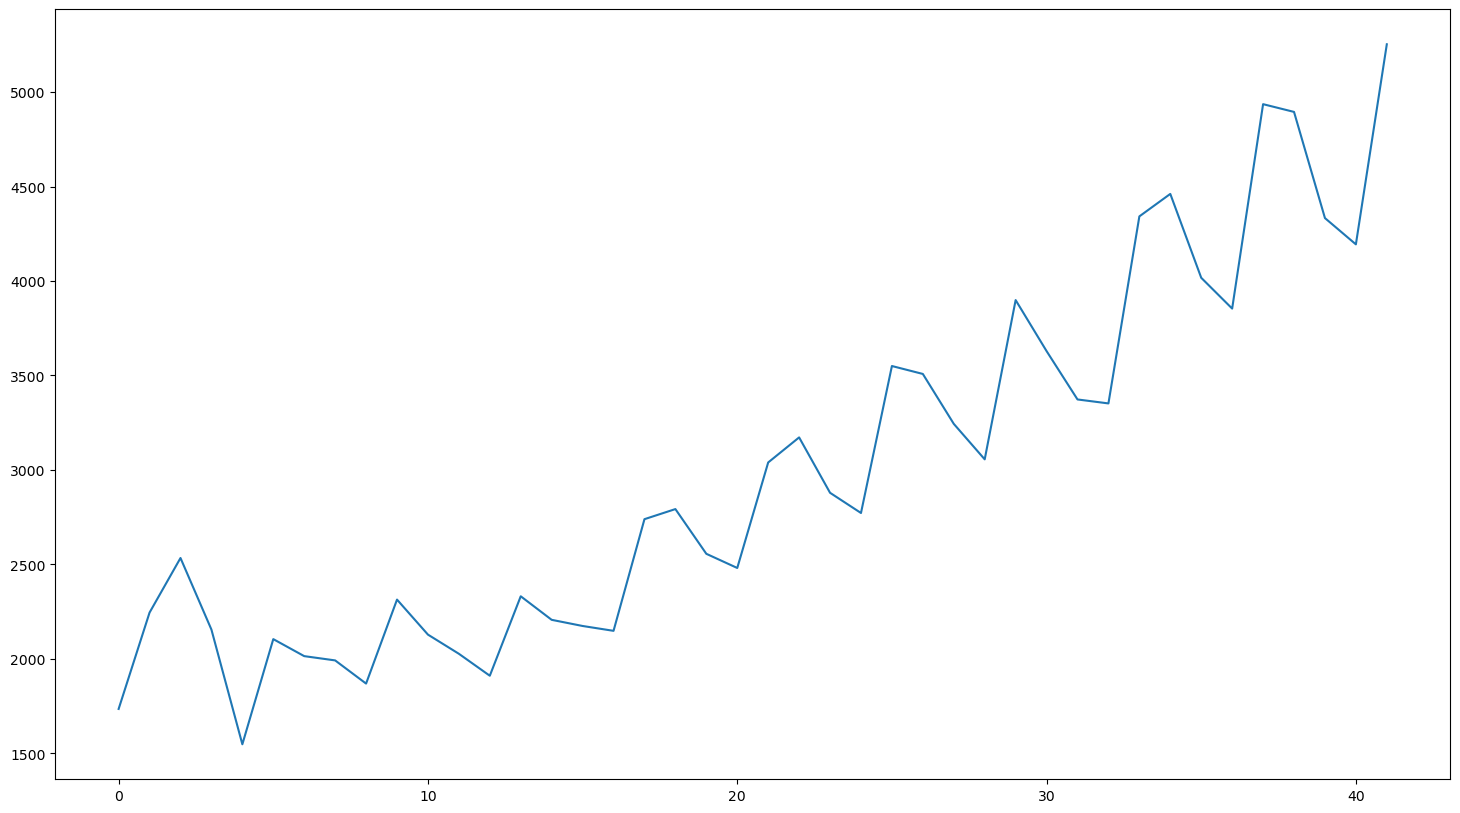

In [45]:
plt.figure(figsize=(18,10))
plt.plot(coke[['Sales','forecasted_Sales']].reset_index(drop=True))
plt.show()

In [46]:
Train = coke.head(35)
Test = coke.tail(7)

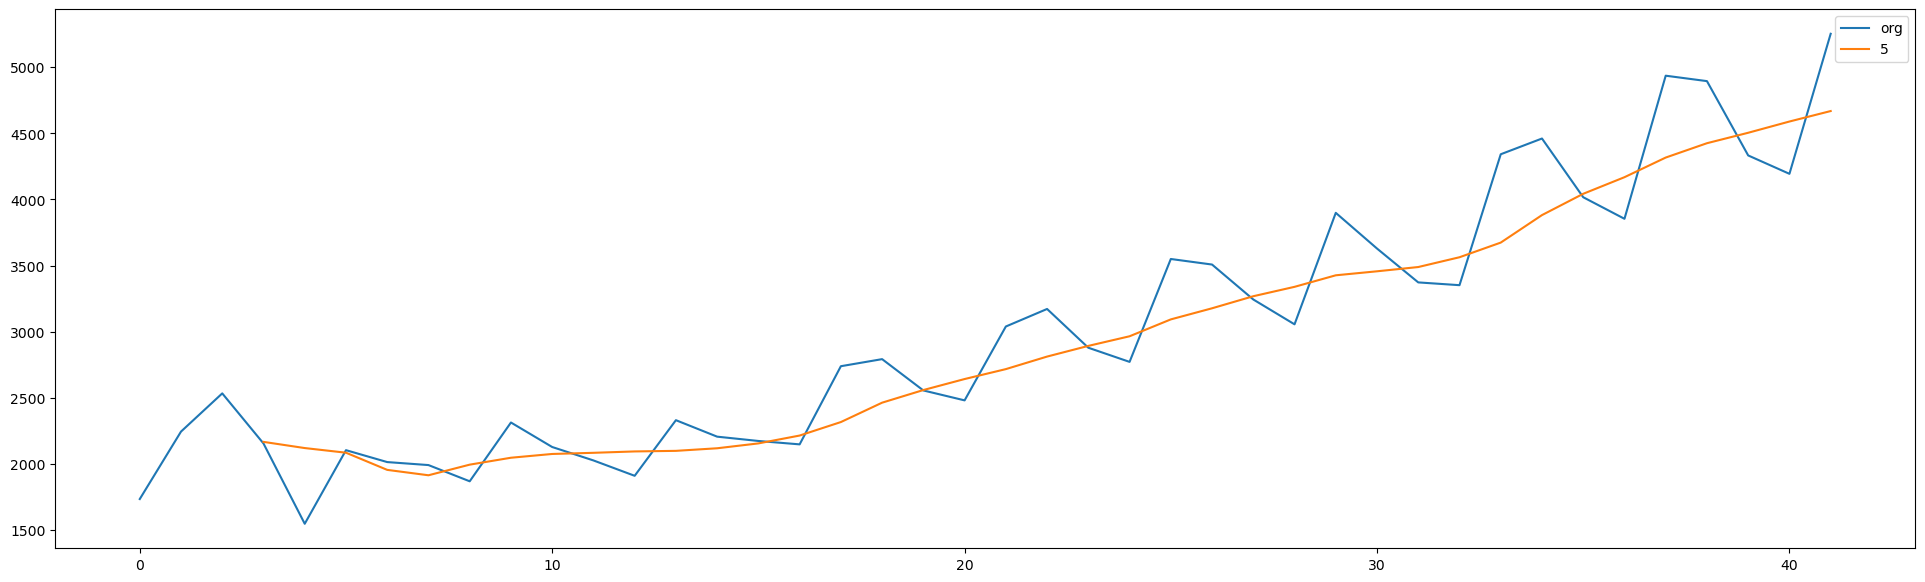

In [47]:
plt.figure(figsize=(24,7))
coke['Sales'].plot(label="org")
coke["Sales"].rolling(4).mean().plot(label=str(5))
plt.legend(loc='best')
plt.show()

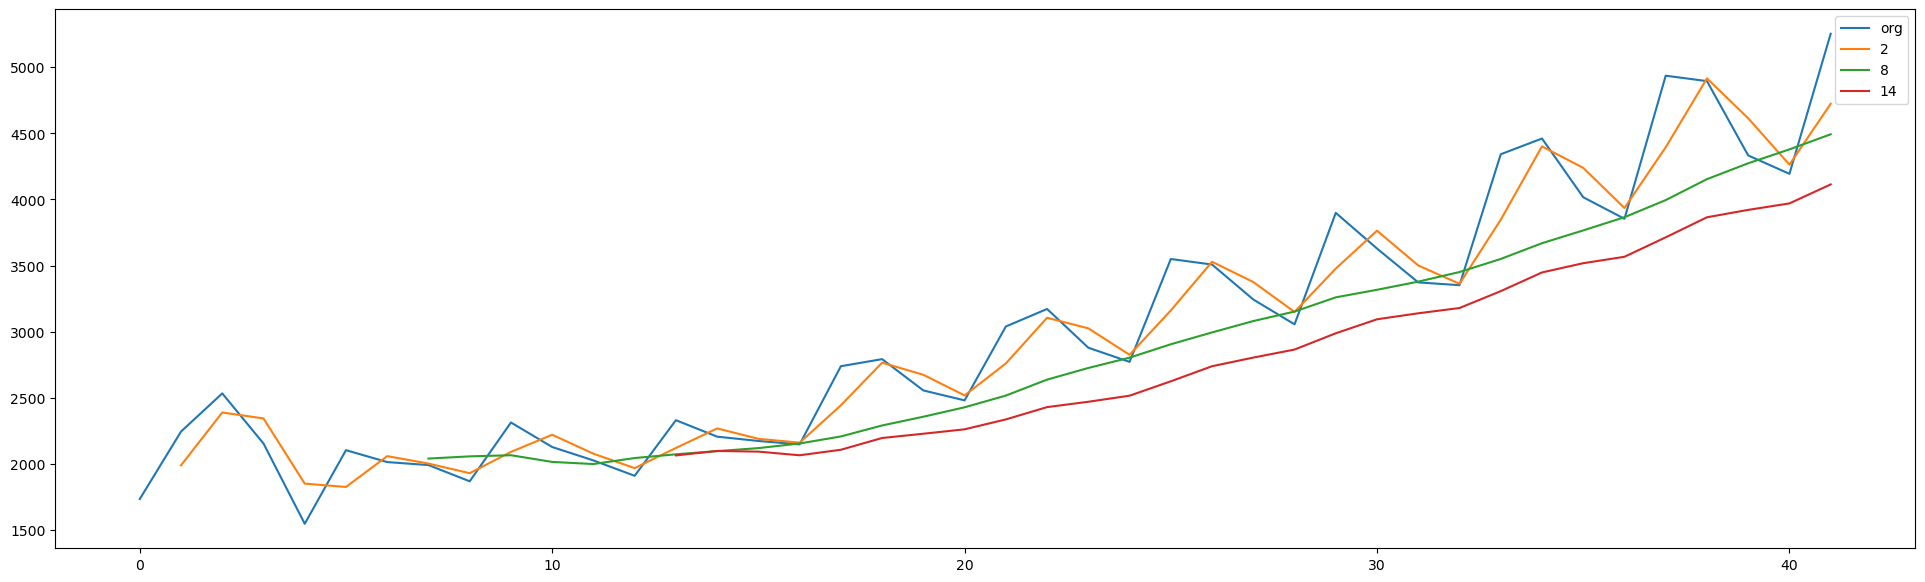

In [48]:
plt.figure(figsize=(24,7))
coke['Sales'].plot(label="org")
for i in range(2,18,6):
    coke["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')
plt.show()

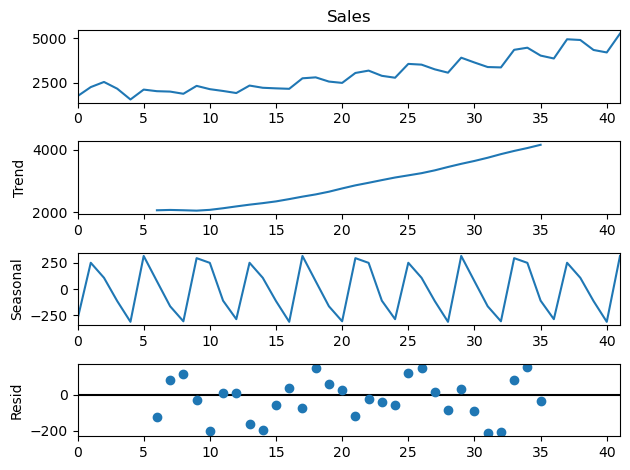

In [49]:
decompose_ts_add = seasonal_decompose(coke['Sales'], period = 12)
decompose_ts_add.plot()
plt.show()

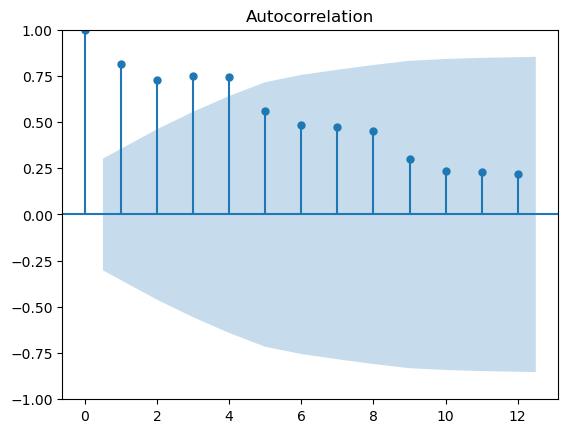

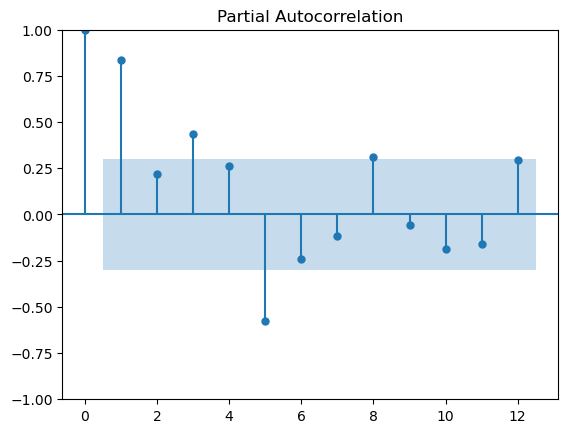

In [50]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(coke.Sales,lags=12)
tsa_plots.plot_pacf(coke.Sales,lags=12)
plt.show()

In [51]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [52]:
ses_model = SimpleExpSmoothing(Train["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Sales) 

16.401824918382285

In [53]:
# Holt method 
hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales)

15.891434465798794

In [54]:
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales)

5.308475130916448

In [55]:
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales)

4.688998255188624

In [56]:
hwe_model_mul_add = ExponentialSmoothing(coke["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit() 

In [57]:
#Forecasting for next 7 time periods
hwe_model_mul_add.forecast(7)

42    5012.344209
43    4653.573883
44    4512.618744
45    5673.548341
46    5715.159774
47    5161.415217
48    4909.552114
dtype: float64

In [58]:
# Another way to perform foreast

In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import calendar
from math import sqrt
from pandas import datetime
import plotly.express as px
from scipy.stats import boxcox
import plotly.graph_objects as go
from pandas.plotting import lag_plot
import statsmodels.formula.api as smf 
from plotly.subplots import make_subplots
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [60]:
coke=pd.read_excel('../Assignment 18-Forecasting/CocaCola_Sales_Rawdata.xlsx')
coke

Quarter        Sales
0    Q1_86  1734.827000
1    Q2_86  2244.960999
2    Q3_86  2533.804993
3    Q4_86  2154.962997
4    Q1_87  1547.818996
5    Q2_87  2104.411995
6    Q3_87  2014.362999
7    Q4_87  1991.746998
8    Q1_88  1869.049999
9    Q2_88  2313.631996
10   Q3_88  2128.320000
11   Q4_88  2026.828999
12   Q1_89  1910.603996
13   Q2_89  2331.164993
14   Q3_89  2206.549995
15   Q4_89  2173.967995
16   Q1_90  2148.278000
17   Q2_90  2739.307999
18   Q3_90  2792.753998
19   Q4_90  2556.009995
20   Q1_91  2480.973999
21   Q2_91  3039.522995
22   Q3_91  3172.115997
23   Q4_91  2879.000999
24   Q1_92  2772.000000
25   Q2_92  3550.000000
26   Q3_92  3508.000000
27   Q4_92  3243.859993
28   Q1_93  3056.000000
29   Q2_93  3899.000000
30   Q3_93  3629.000000
31   Q4_93  3373.000000
32   Q1_94  3352.000000
33   Q2_94  4342.000000
34   Q3_94  4461.000000
35   Q4_94  4017.000000
36   Q1_95  3854.000000
37   Q2_95  4936.000000
38   Q3_95  4895.000000
39   Q4_95  4333.000000
40   Q1_96  4194.000000
41   Q2_96  5253.000000

In [61]:
coke.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [62]:
coke['Quarter_Year'] = coke['Quarter'].str.split('_').apply(lambda x: ' 19'.join(x[:]))

coke.head(10)

Quarter        Sales Quarter_Year
0   Q1_86  1734.827000      Q1 1986
1   Q2_86  2244.960999      Q2 1986
2   Q3_86  2533.804993      Q3 1986
3   Q4_86  2154.962997      Q4 1986
4   Q1_87  1547.818996      Q1 1987
5   Q2_87  2104.411995      Q2 1987
6   Q3_87  2014.362999      Q3 1987
7   Q4_87  1991.746998      Q4 1987
8   Q1_88  1869.049999      Q1 1988
9   Q2_88  2313.631996      Q2 1988

In [63]:
coke['Date'] = (pd.to_datetime(coke['Quarter_Year'].str.split(' ').apply(lambda x: ''.join(x[::-1])),dayfirst=True))
coke.head(10)

Quarter        Sales Quarter_Year       Date
0   Q1_86  1734.827000      Q1 1986 1986-01-01
1   Q2_86  2244.960999      Q2 1986 1986-04-01
2   Q3_86  2533.804993      Q3 1986 1986-07-01
3   Q4_86  2154.962997      Q4 1986 1986-10-01
4   Q1_87  1547.818996      Q1 1987 1987-01-01
5   Q2_87  2104.411995      Q2 1987 1987-04-01
6   Q3_87  2014.362999      Q3 1987 1987-07-01
7   Q4_87  1991.746998      Q4 1987 1987-10-01
8   Q1_88  1869.049999      Q1 1988 1988-01-01
9   Q2_88  2313.631996      Q2 1988 1988-04-01

In [64]:
coke['Quarters'] = 0

for i in range(42):
    n = coke['Quarter'][i]
    coke['Quarters'][i] = n[0:2]

coke.head(10)

Quarter        Sales Quarter_Year       Date Quarters
0   Q1_86  1734.827000      Q1 1986 1986-01-01       Q1
1   Q2_86  2244.960999      Q2 1986 1986-04-01       Q2
2   Q3_86  2533.804993      Q3 1986 1986-07-01       Q3
3   Q4_86  2154.962997      Q4 1986 1986-10-01       Q4
4   Q1_87  1547.818996      Q1 1987 1987-01-01       Q1
5   Q2_87  2104.411995      Q2 1987 1987-04-01       Q2
6   Q3_87  2014.362999      Q3 1987 1987-07-01       Q3
7   Q4_87  1991.746998      Q4 1987 1987-10-01       Q4
8   Q1_88  1869.049999      Q1 1988 1988-01-01       Q1
9   Q2_88  2313.631996      Q2 1988 1988-04-01       Q2

In [65]:
dummy = pd.DataFrame(pd.get_dummies(coke['Quarters']))
coke1 = pd.concat((coke, dummy), axis=1)

coke1.head()

Quarter        Sales Quarter_Year       Date Quarters  Q1  Q2  Q3  Q4
0   Q1_86  1734.827000      Q1 1986 1986-01-01       Q1   1   0   0   0
1   Q2_86  2244.960999      Q2 1986 1986-04-01       Q2   0   1   0   0
2   Q3_86  2533.804993      Q3 1986 1986-07-01       Q3   0   0   1   0
3   Q4_86  2154.962997      Q4 1986 1986-10-01       Q4   0   0   0   1
4   Q1_87  1547.818996      Q1 1987 1987-01-01       Q1   1   0   0   0

In [66]:
coke1.drop(['Quarter','Quarter_Year'] , axis =1, inplace = True)
coke1.head()

Sales       Date Quarters  Q1  Q2  Q3  Q4
0  1734.827000 1986-01-01       Q1   1   0   0   0
1  2244.960999 1986-04-01       Q2   0   1   0   0
2  2533.804993 1986-07-01       Q3   0   0   1   0
3  2154.962997 1986-10-01       Q4   0   0   0   1
4  1547.818996 1987-01-01       Q1   1   0   0   0

In [67]:
coke1.set_index('Date',inplace=True)
coke1.index.year

Int64Index([1986, 1986, 1986, 1986, 1987, 1987, 1987, 1987, 1988, 1988, 1988,
            1988, 1989, 1989, 1989, 1989, 1990, 1990, 1990, 1990, 1991, 1991,
            1991, 1991, 1992, 1992, 1992, 1992, 1993, 1993, 1993, 1993, 1994,
            1994, 1994, 1994, 1995, 1995, 1995, 1995, 1996, 1996],
           dtype='int64', name='Date')

In [68]:
coke1.head()

Sales Quarters  Q1  Q2  Q3  Q4
Date                                            
1986-01-01  1734.827000       Q1   1   0   0   0
1986-04-01  2244.960999       Q2   0   1   0   0
1986-07-01  2533.804993       Q3   0   0   1   0
1986-10-01  2154.962997       Q4   0   0   0   1
1987-01-01  1547.818996       Q1   1   0   0   0

In [69]:
coke["Date"] = pd.to_datetime(coke.Date,format="%b-%y")
coke["month"] = coke.Date.dt.strftime("%b") # month extraction
coke["year"] = coke.Date.dt.strftime("%Y") # year extraction
coke.head(10)

Quarter        Sales Quarter_Year       Date Quarters month  year
0   Q1_86  1734.827000      Q1 1986 1986-01-01       Q1   Jan  1986
1   Q2_86  2244.960999      Q2 1986 1986-04-01       Q2   Apr  1986
2   Q3_86  2533.804993      Q3 1986 1986-07-01       Q3   Jul  1986
3   Q4_86  2154.962997      Q4 1986 1986-10-01       Q4   Oct  1986
4   Q1_87  1547.818996      Q1 1987 1987-01-01       Q1   Jan  1987
5   Q2_87  2104.411995      Q2 1987 1987-04-01       Q2   Apr  1987
6   Q3_87  2014.362999      Q3 1987 1987-07-01       Q3   Jul  1987
7   Q4_87  1991.746998      Q4 1987 1987-10-01       Q4   Oct  1987
8   Q1_88  1869.049999      Q1 1988 1988-01-01       Q1   Jan  1988
9   Q2_88  2313.631996      Q2 1988 1988-04-01       Q2   Apr  1988

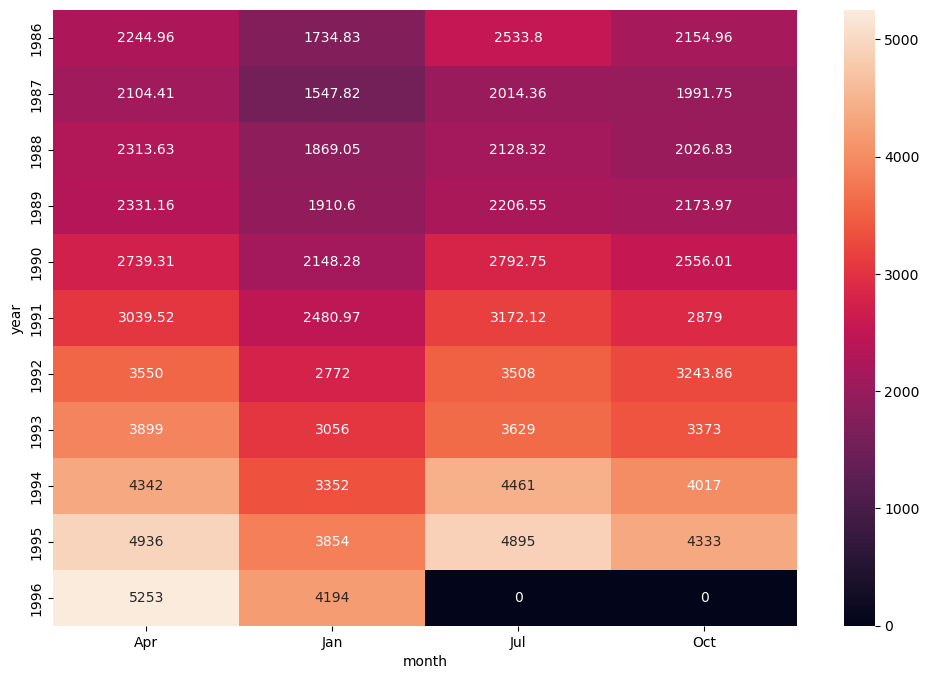

In [70]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=coke, values="Sales", index="year", columns="month", aggfunc="mean", fill_value=0)
sns.heatmap(heatmap_y_month, annot=True, fmt="g")
plt.show()

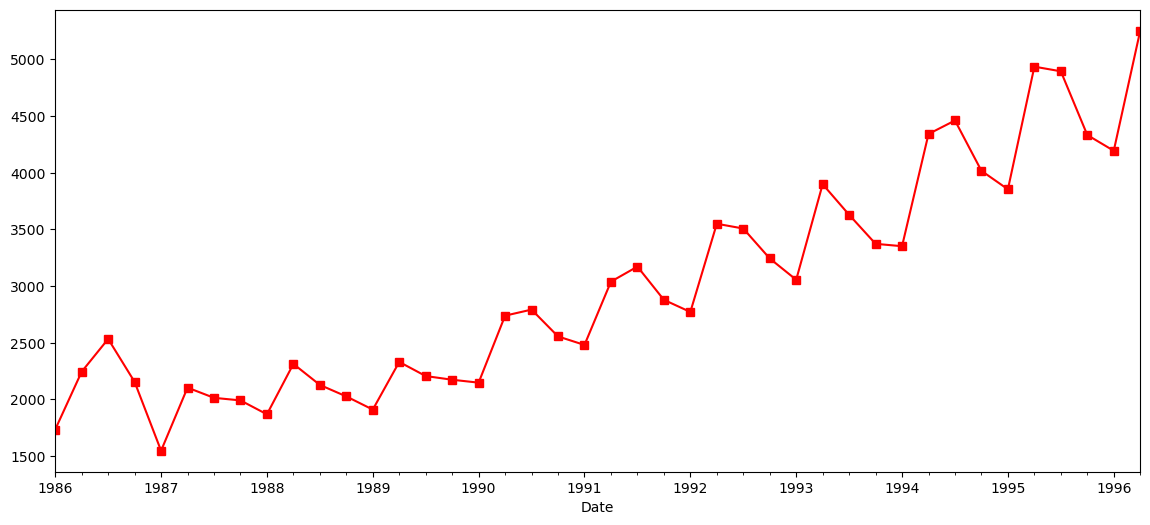

In [71]:
coke1['Sales'].plot(figsize=(14,6), color='red', marker='s')
plt.show()

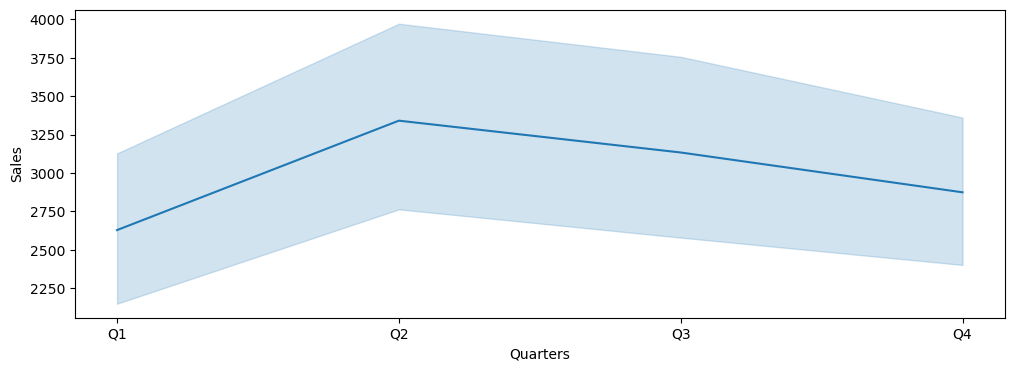

In [72]:
plt.figure(figsize=(12,4))
sns.lineplot(x="Quarters", y="Sales", data=coke)
plt.show()

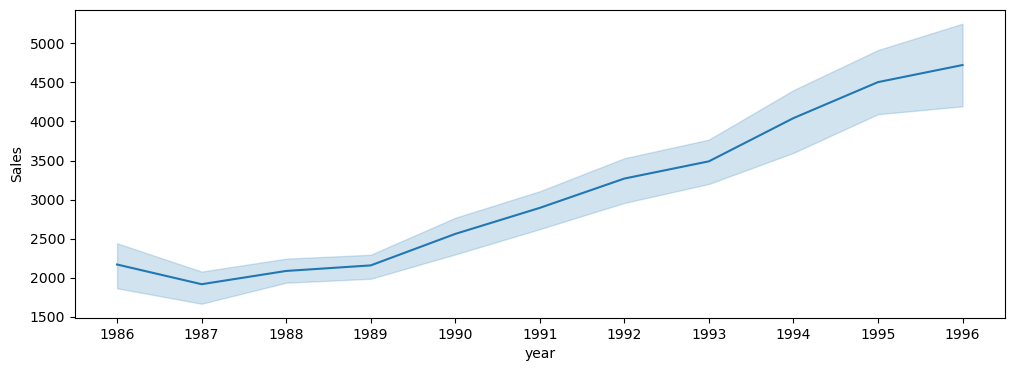

In [73]:
plt.figure(figsize=(12,4))
sns.lineplot(x="year",y="Sales",data=coke)
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

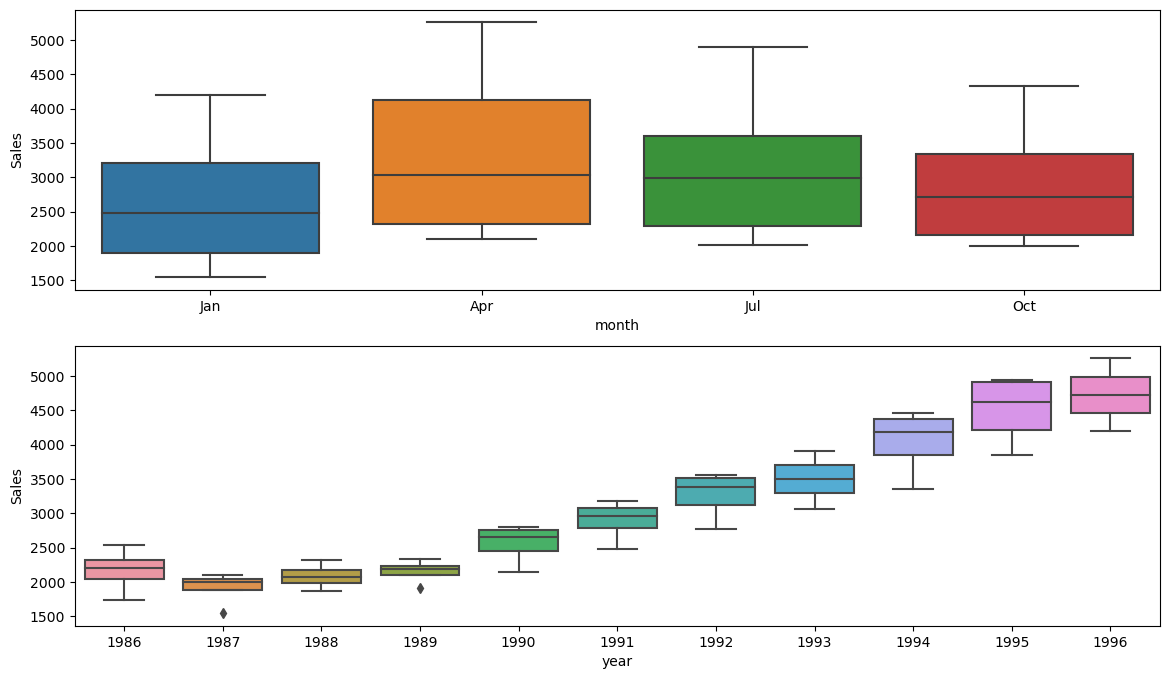

In [74]:
plt.figure(figsize=(14,8))
plt.subplot(211)
sns.boxplot(x="month",y="Sales",data=coke)
plt.subplot(212)
sns.boxplot(x="year",y="Sales",data=coke)
plt.show()

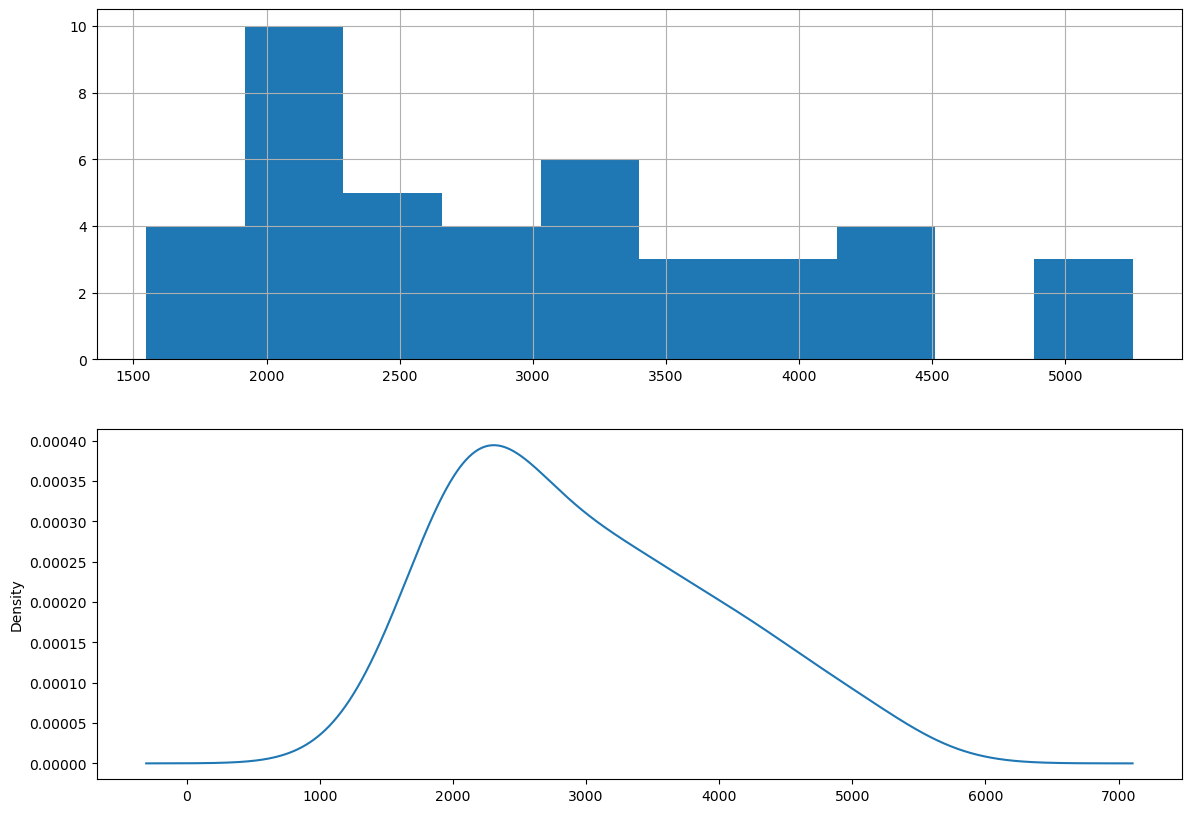

In [75]:
plt.figure(figsize=(14,10))
plt.subplot(211)
coke.Sales.hist()
plt.subplot(212)
coke.Sales.plot(kind='kde')
plt.show()

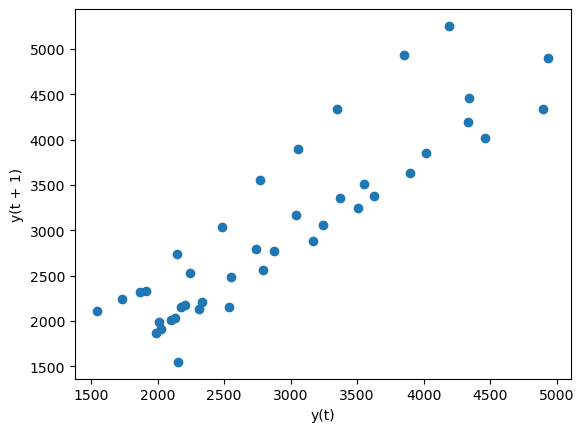

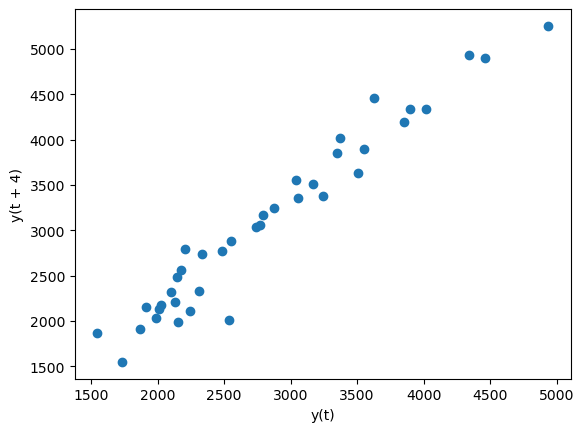

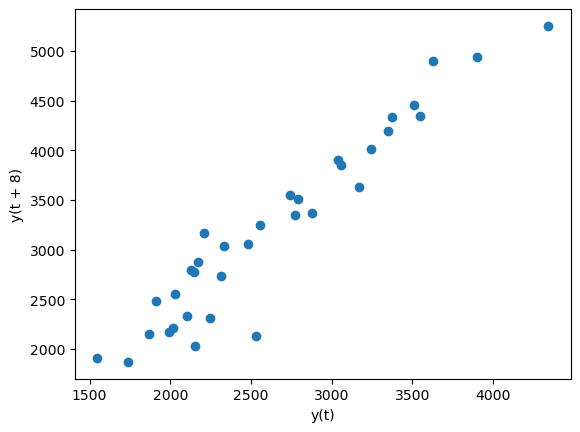

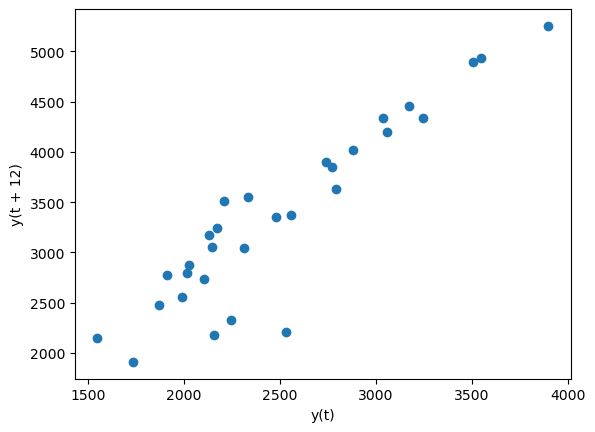

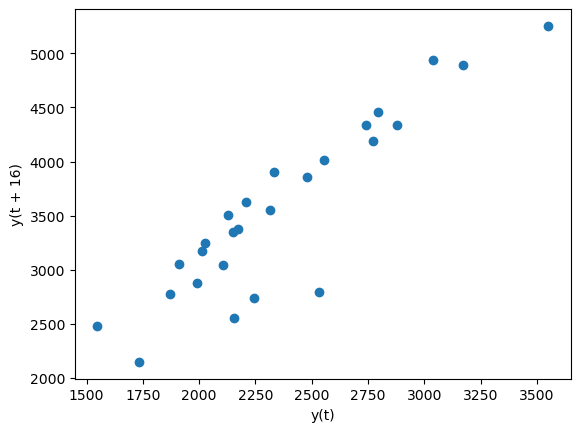

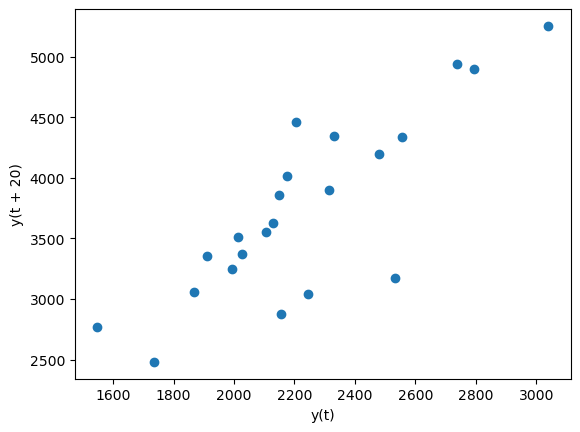

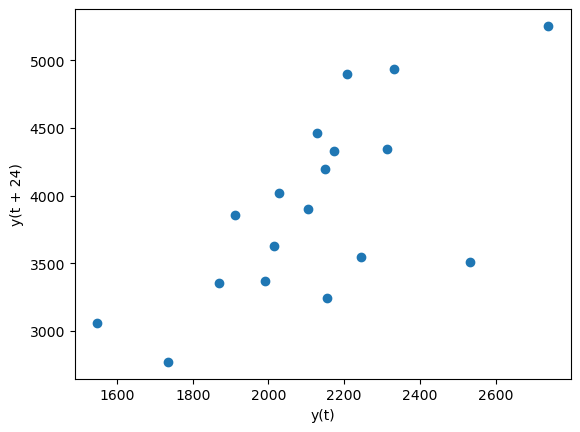

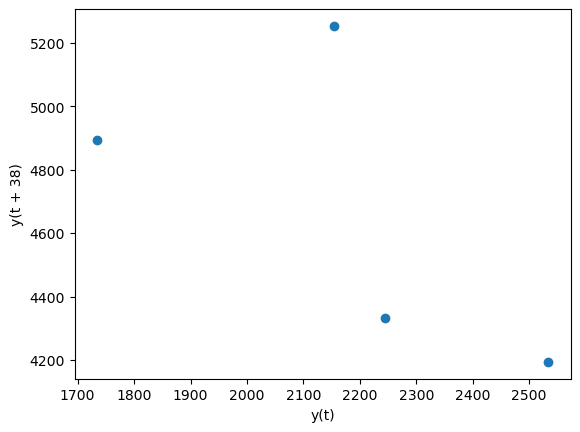

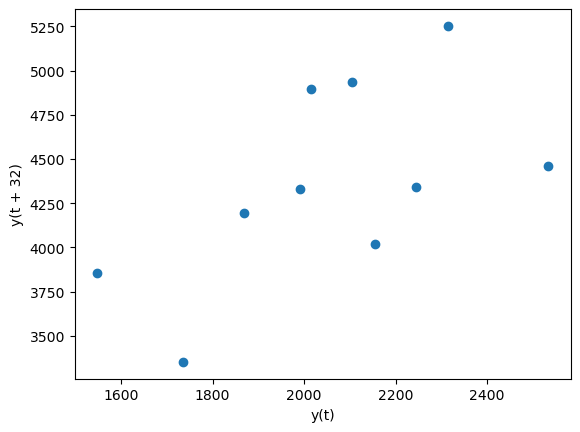

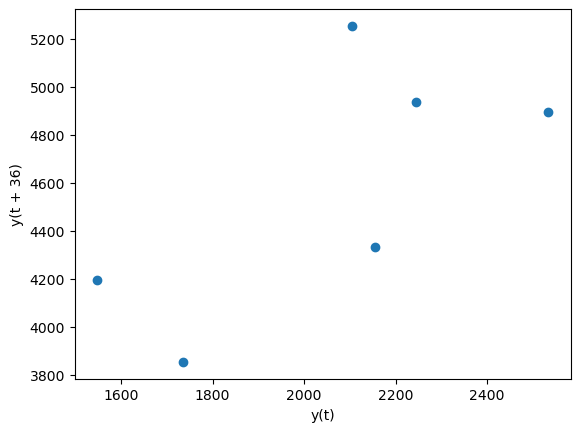

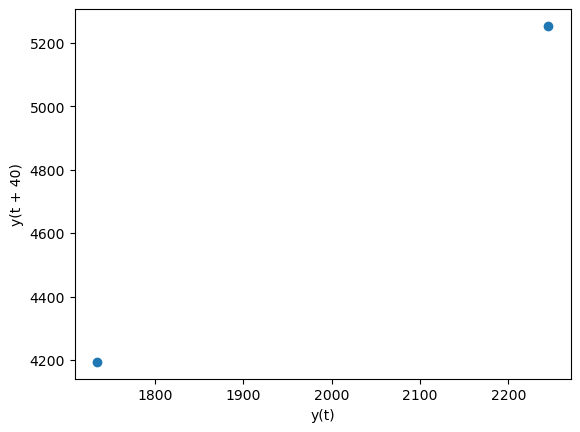

In [76]:

from pandas.plotting import lag_plot
# create a scatter plot
for i in [1, 4, 8, 12, 16, 20, 24, 38, 32, 36, 40]:
    lag_plot(coke.Sales, lag=i)
    plt.show()

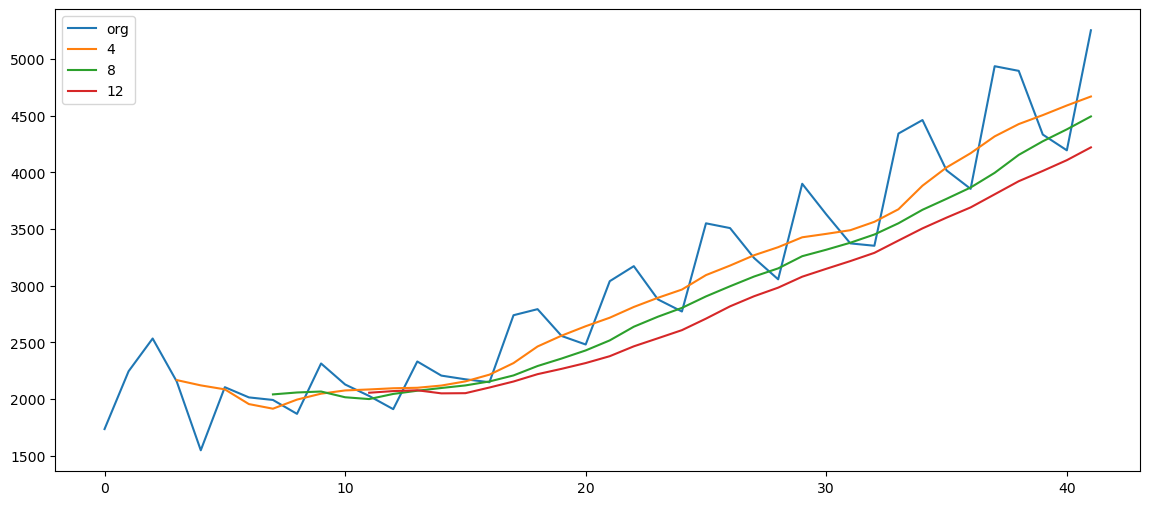

In [77]:
plt.figure(figsize=(14,6))
coke.Sales.plot(label="org")
for i in range(4,13,4):
    coke["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')
plt.show()

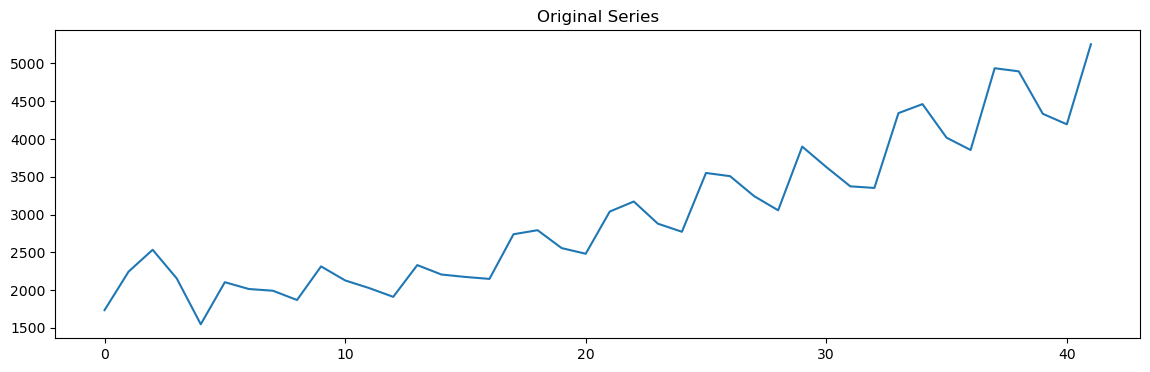

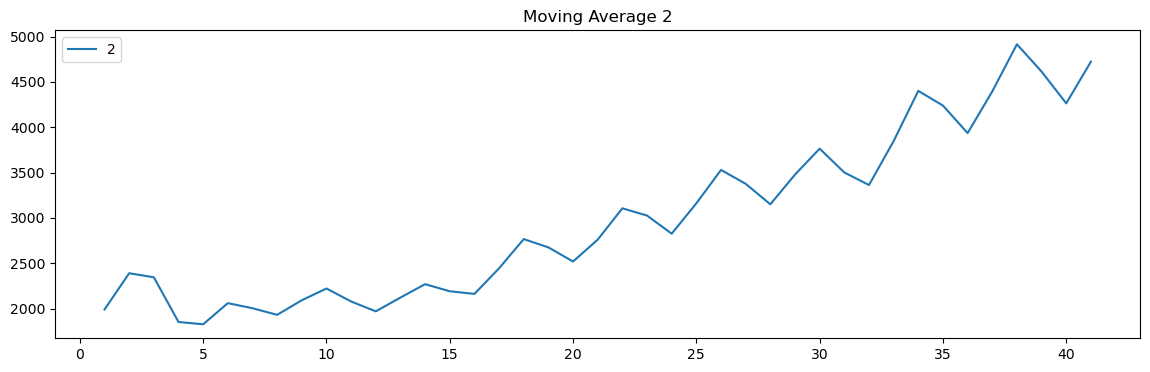

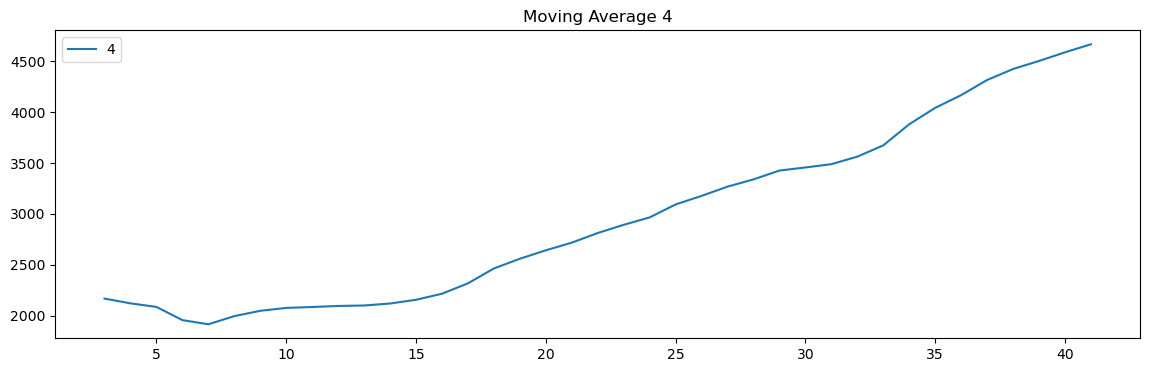

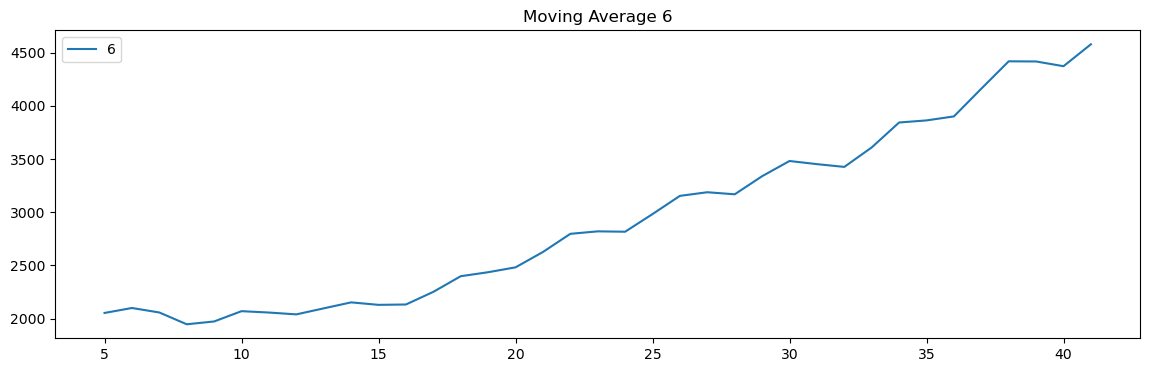

In [78]:
plt.figure(figsize=(14,4))
coke.Sales.plot(label="org")
plt.title("Original Series")
for i in range(2,7,2):
    plt.figure(figsize=(14,4))
    coke["Sales"].rolling(i).mean().plot(label=str(i))
    plt.title("Moving Average "+str(i))
    plt.legend(loc='best')
    plt.show()

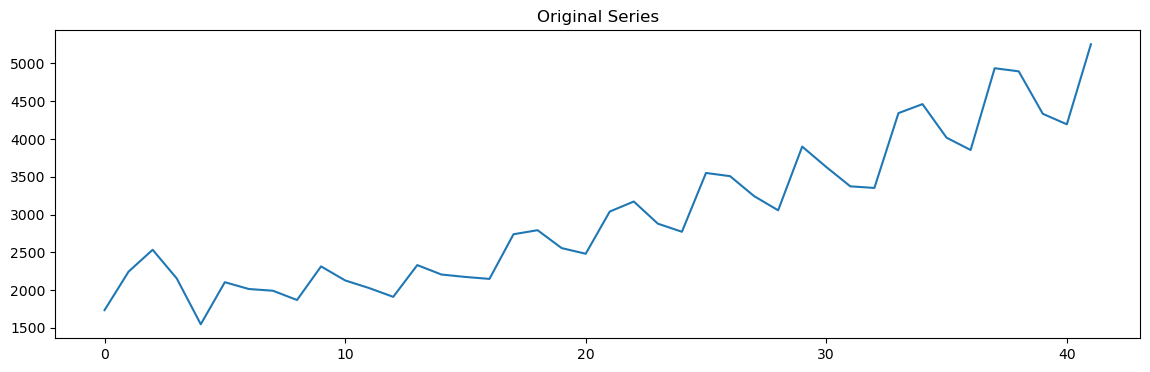

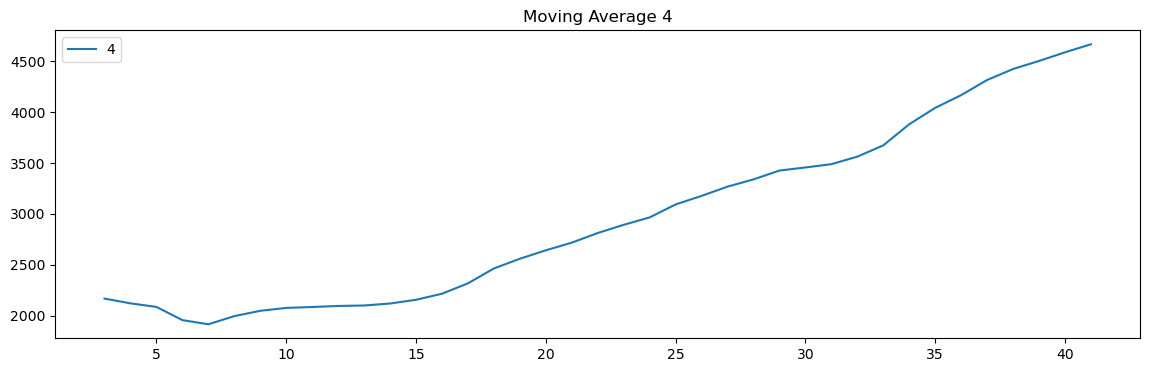

In [79]:
plt.figure(figsize=(14,4))
coke.Sales.plot(label="org")
plt.title("Original Series")
plt.figure(figsize=(14,4))
coke["Sales"].rolling(4).mean().plot(label=str(4))
plt.title("Moving Average "+str(4))
plt.legend(loc='best')
plt.show()

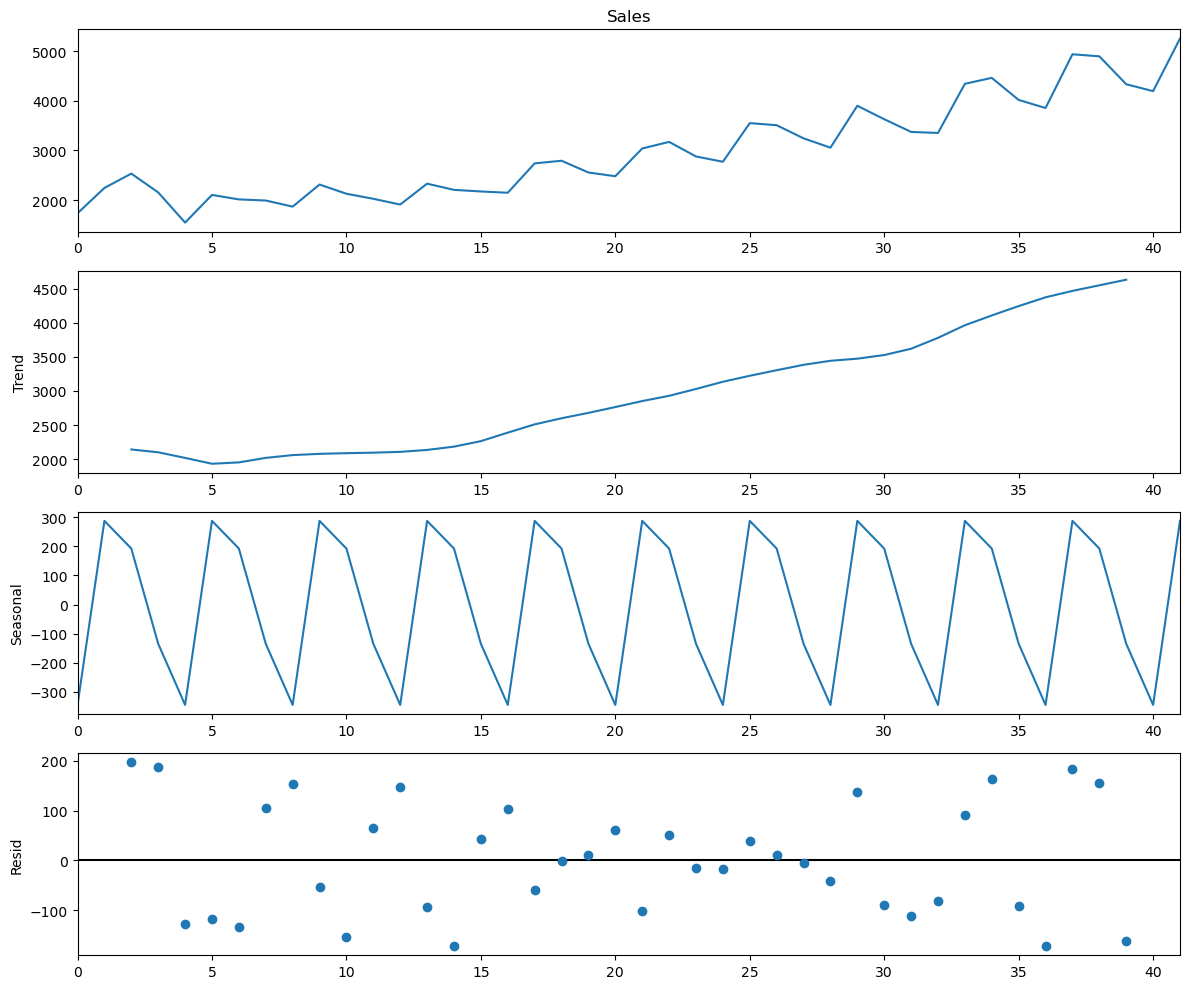

In [80]:
decompose_ts_add = seasonal_decompose(coke.Sales,period=4)
with plt.rc_context():
    plt.rc("figure", figsize=(12,10))
    decompose_ts_add.plot()
    plt.show()

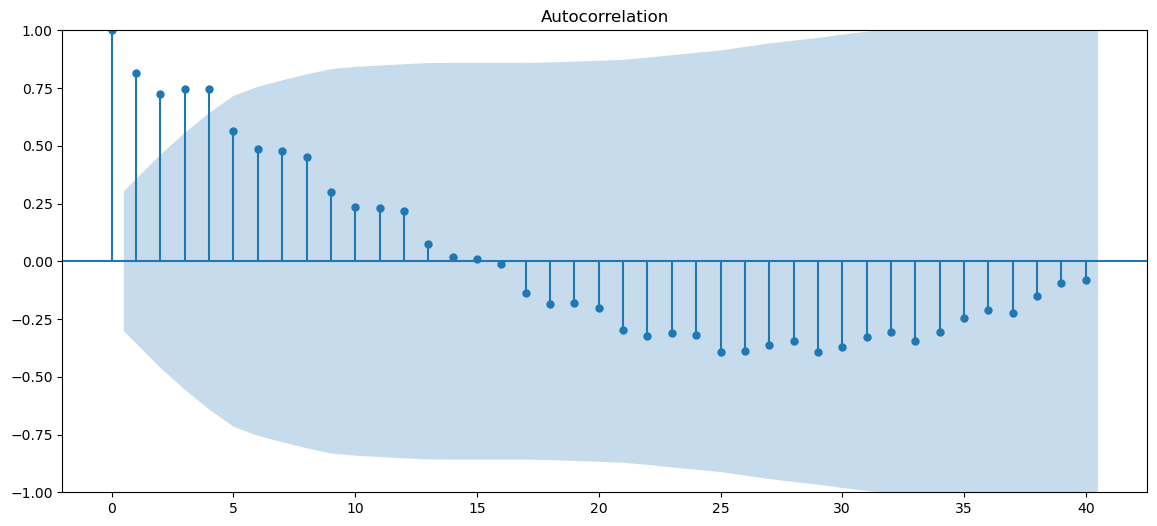

In [81]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure", figsize=(14,6))
    tsa_plots.plot_acf(coke.Sales,lags=40)
    plt.show()

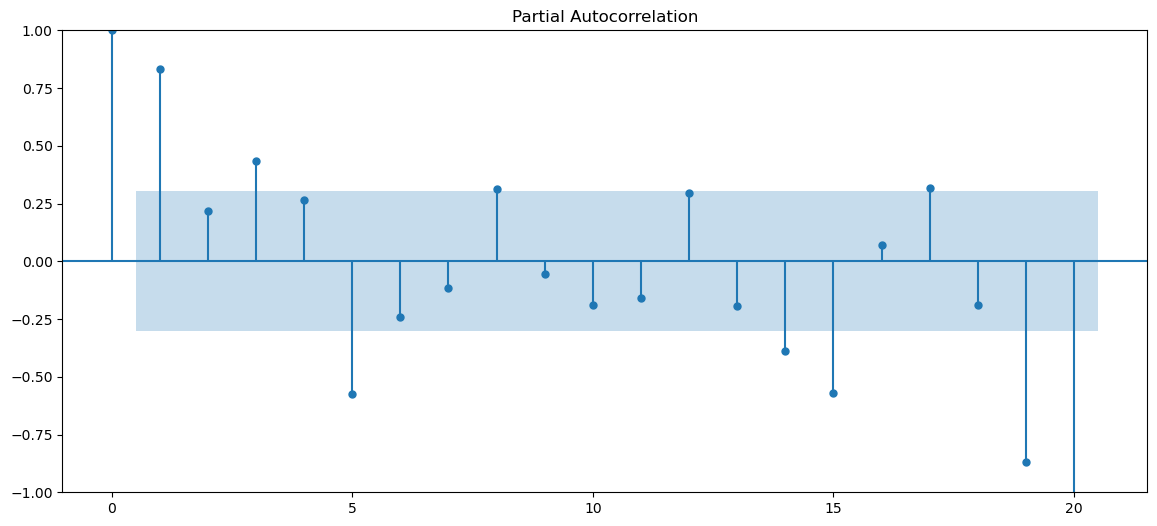

In [82]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure", figsize=(14,6))
    tsa_plots.plot_pacf(coke.Sales,lags=20)
    plt.show()


In [83]:
upsampled_month = coke1.drop(['Quarters','Q1','Q2','Q3','Q4'], axis=1)
upsampled_month = upsampled_month.resample('M').mean()
print(upsampled_month.head(13))

                  Sales
Date                   
1986-01-31  1734.827000
1986-02-28          NaN
1986-03-31          NaN
1986-04-30  2244.960999
1986-05-31          NaN
1986-06-30          NaN
1986-07-31  2533.804993
1986-08-31          NaN
1986-09-30          NaN
1986-10-31  2154.962997
1986-11-30          NaN
1986-12-31          NaN
1987-01-31  1547.818996


                  Sales
Date                   
1986-01-31  1734.827000
1986-02-28  1904.871666
1986-03-31  2074.916332
1986-04-30  2244.960999
1986-05-31  2341.242330
1986-06-30  2437.523661
1986-07-31  2533.804993
1986-08-31  2407.524328
1986-09-30  2281.243663
1986-10-31  2154.962997
1986-11-30  1952.581664
1986-12-31  1750.200330
1987-01-31  1547.818996


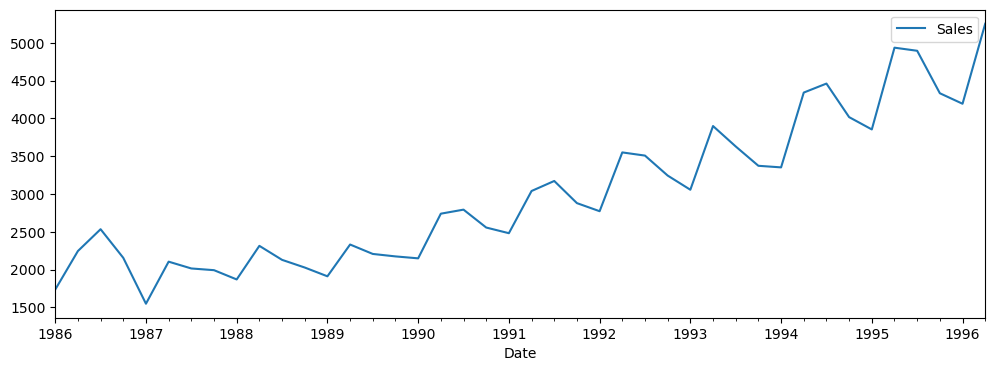

In [84]:
interpolated_month = upsampled_month.interpolate(method='linear')
print(interpolated_month.head(13))
interpolated_month.plot(figsize=(12,4))
plt.show()

In [85]:
interpolated_month

Sales
Date                   
1986-01-31  1734.827000
1986-02-28  1904.871666
1986-03-31  2074.916332
1986-04-30  2244.960999
1986-05-31  2341.242330
...                 ...
1995-12-31  4240.333333
1996-01-31  4194.000000
1996-02-29  4547.000000
1996-03-31  4900.000000
1996-04-30  5253.000000

[124 rows x 1 columns]

In [86]:
visual = interpolated_month.copy()
visual.reset_index(inplace=True)
visual['date'] = pd.to_datetime(visual['Date'])
visual['year'] = visual['Date'].dt.year
visual['month'] = visual['Date'].dt.month
visual['week'] = visual['Date'].dt.isocalendar().week
visual['quarter'] = visual['Date'].dt.quarter
visual['day_of_week'] = visual['Date'].dt.day_name()
visual.drop('Date', axis =1 , inplace= True)
visual[:2]

Sales       date  year  month  week  quarter day_of_week
0  1734.827000 1986-01-31  1986      1     5        1      Friday
1  1904.871666 1986-02-28  1986      2     9        1      Friday

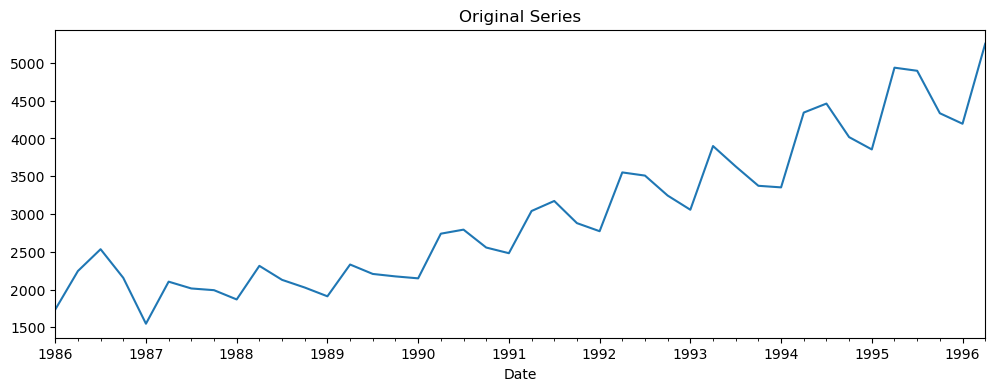

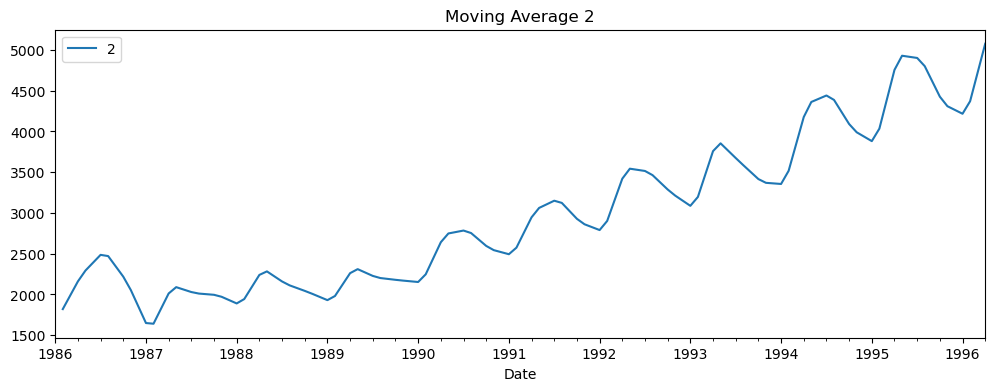

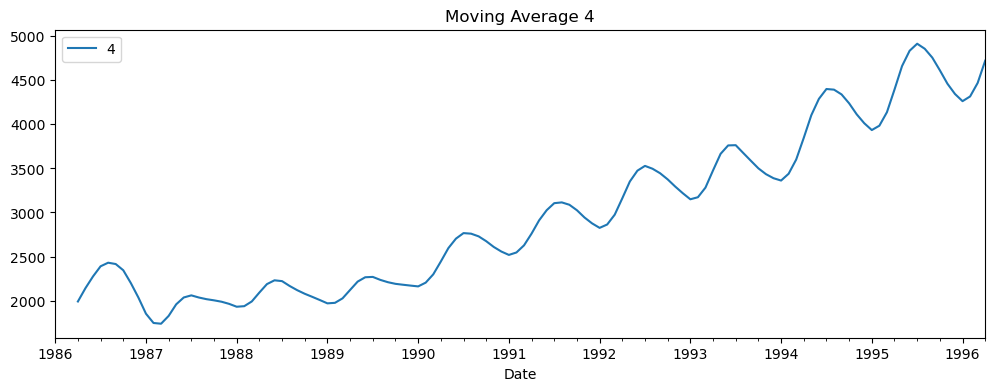

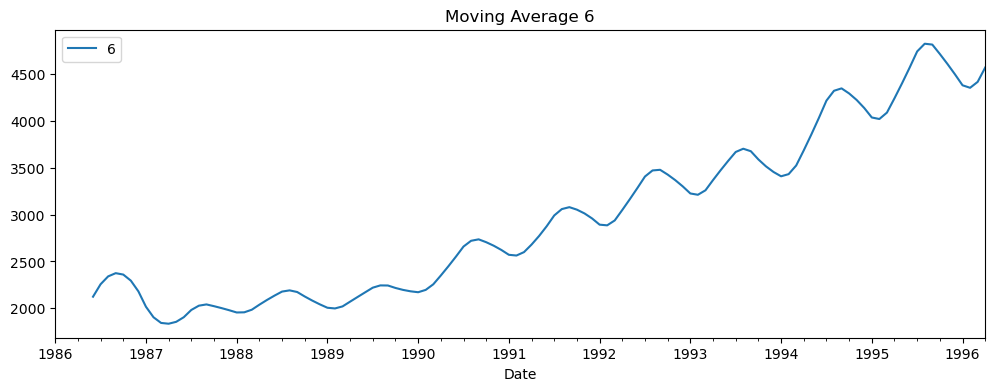

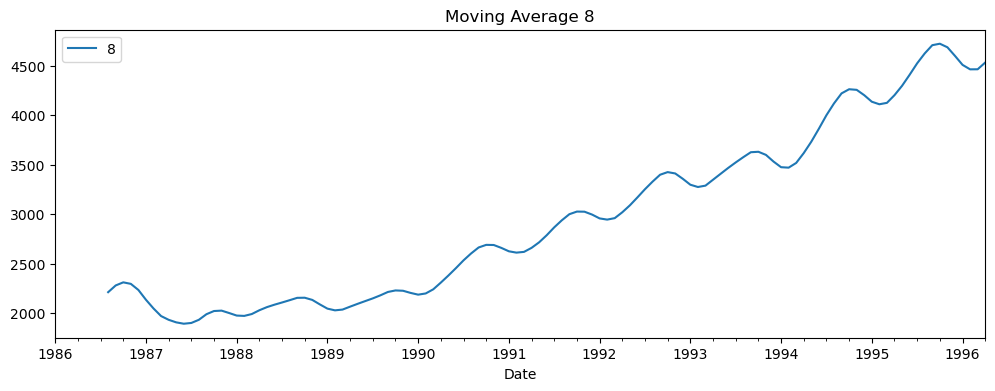

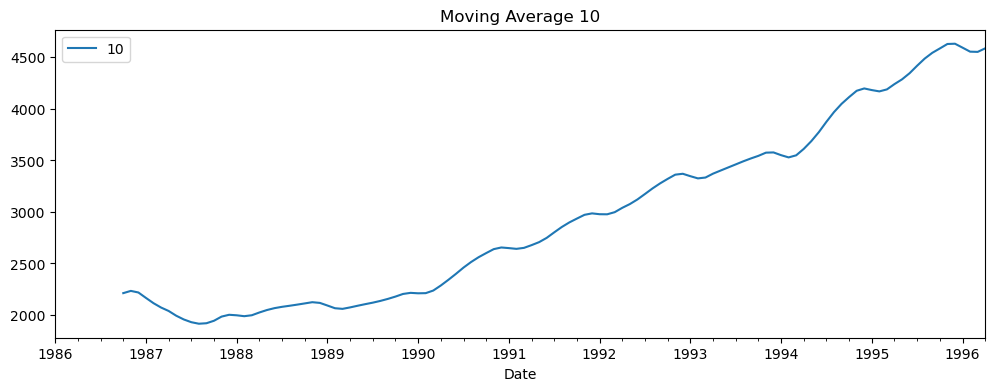

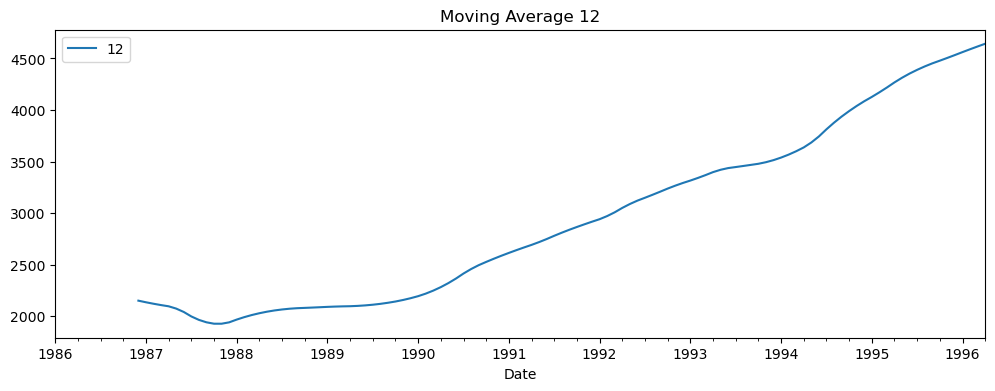

In [87]:
plt.figure(figsize=(12,4))
interpolated_month.Sales.plot(label="org")
plt.title("Original Series")
for i in range(2,13,2):
    plt.figure(figsize=(12,4))
    interpolated_month["Sales"].rolling(i).mean().plot(label=str(i))
    plt.title("Moving Average "+str(i))
    plt.legend(loc='best')
    plt.show()

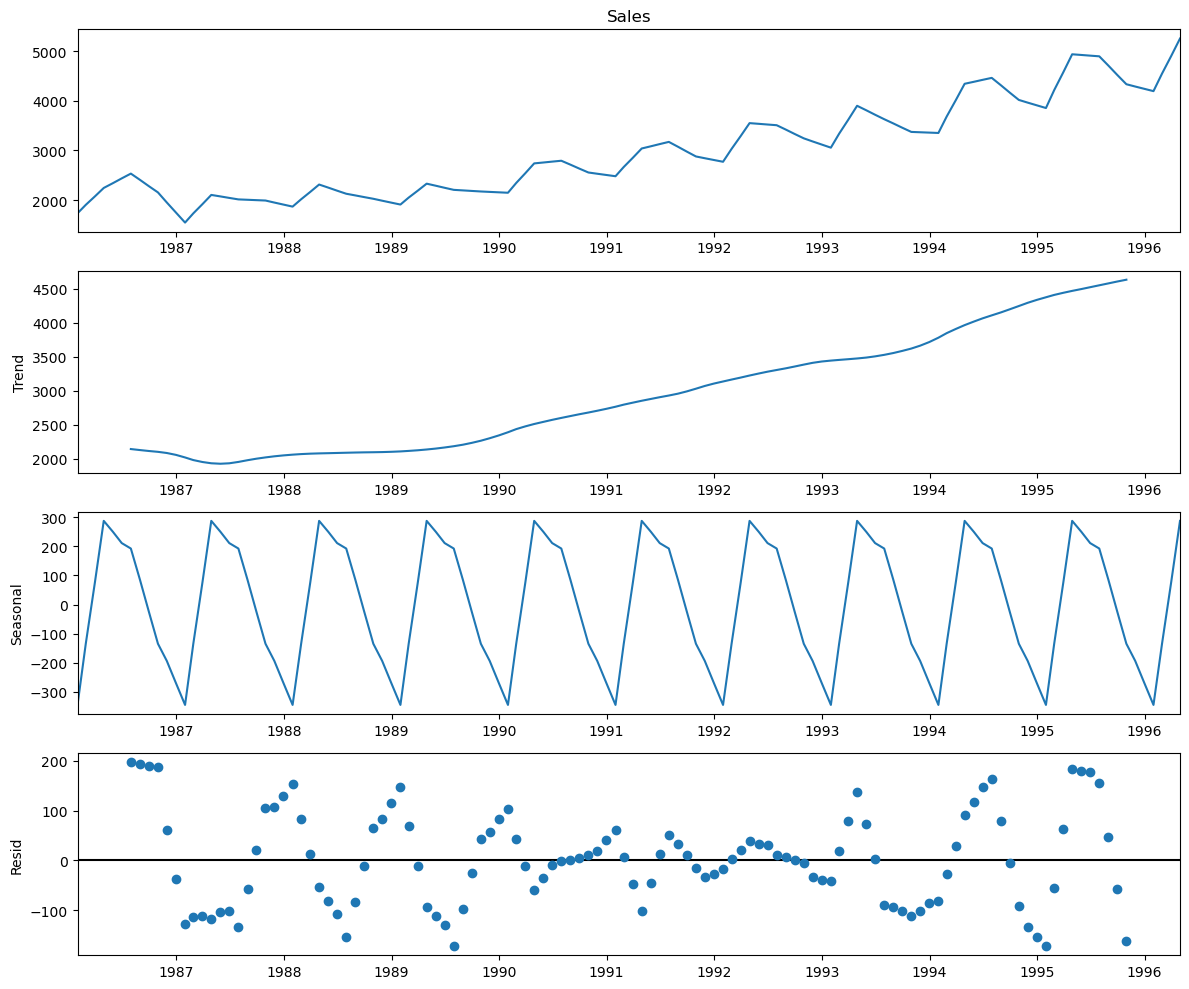

In [88]:
decompose_ts_add = seasonal_decompose(interpolated_month.Sales, period=12, model='additive')
with plt.rc_context():
    plt.rc("figure", figsize=(12,10))
    decompose_ts_add.plot()
    plt.show()

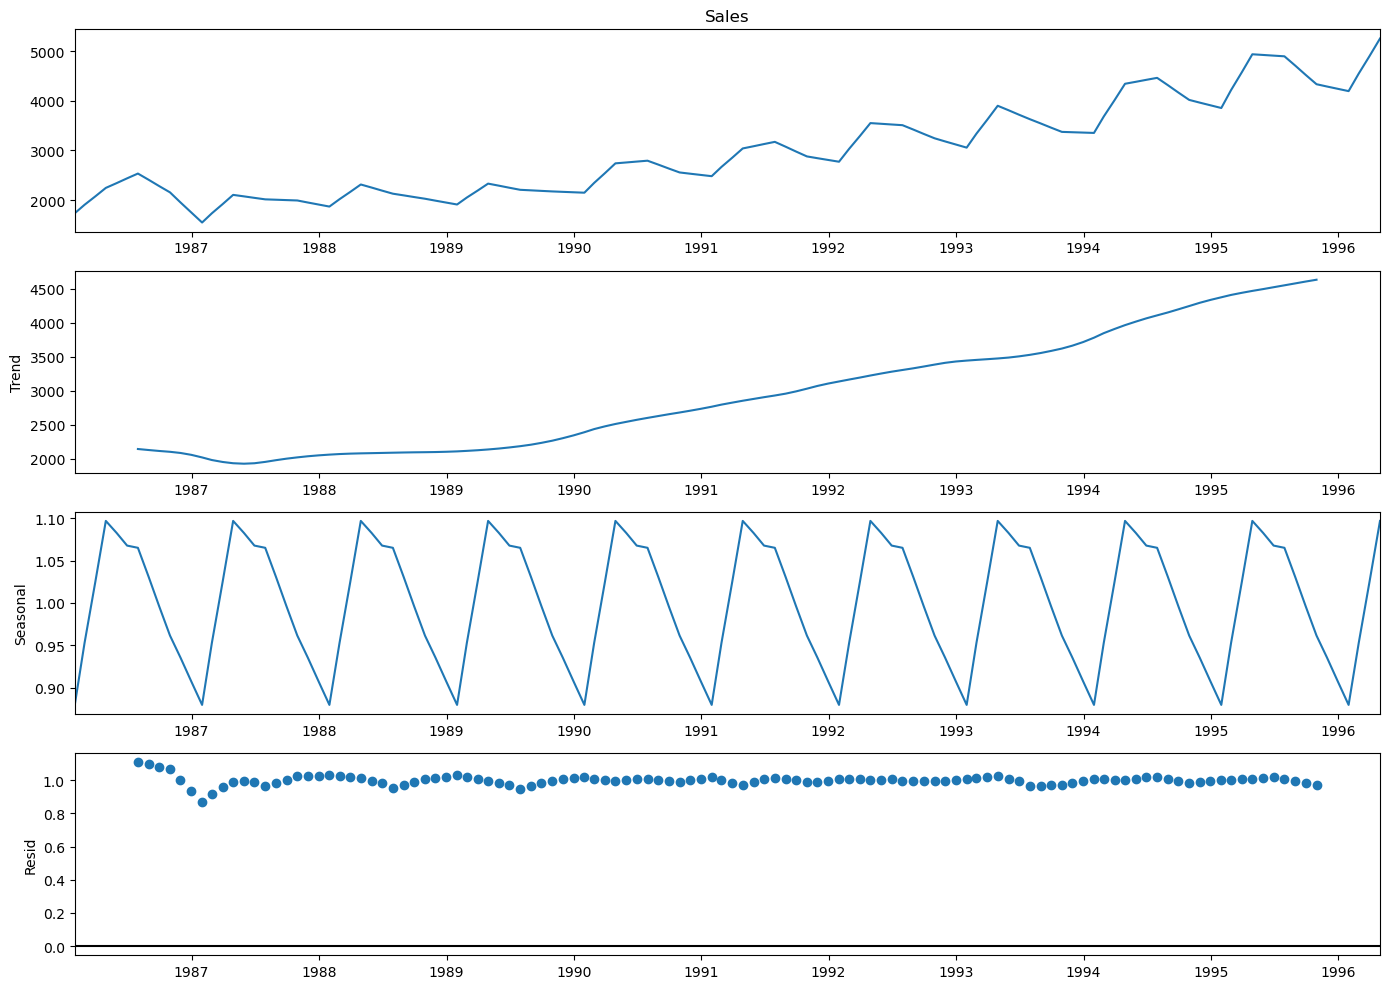

In [89]:
decompose_ts_add = seasonal_decompose(interpolated_month.Sales, period=12, model='multiplicative')
with plt.rc_context():
    plt.rc("figure", figsize=(14,10))
    decompose_ts_add.plot()
    plt.show()

In [90]:
train_data = interpolated_month[:100]
test_data = interpolated_month[100:]

In [91]:
print('Train :',train_data.index.min(),train_data.index.max(),'\n',
'Test :',test_data.index.min(),test_data.index.max())

Train : 1986-01-31 00:00:00 1994-04-30 00:00:00 
 Test : 1994-05-31 00:00:00 1996-04-30 00:00:00


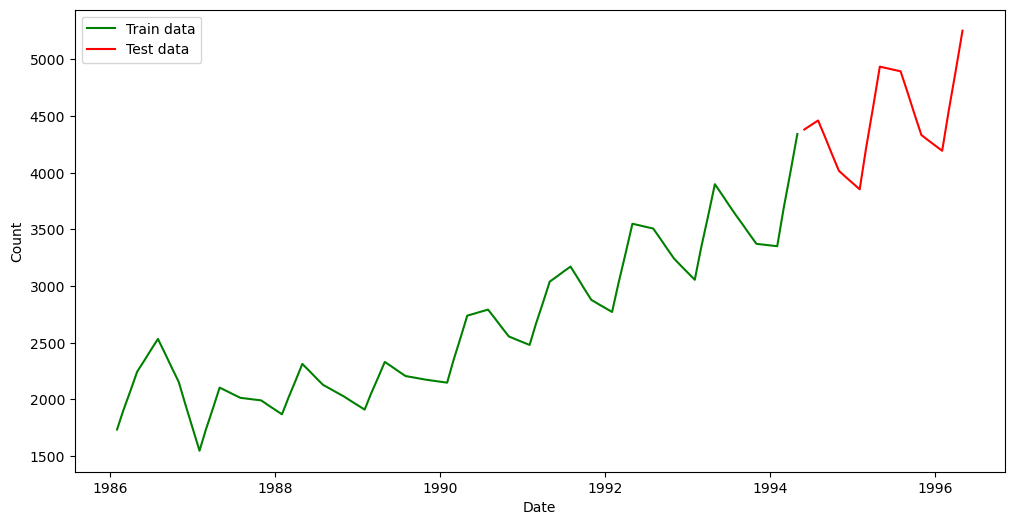

In [92]:
plt.figure(figsize=(12,6))
plt.xlabel('Date')
plt.ylabel('Count')
plt.plot(train_data, 'green', label='Train data')
plt.plot(test_data, 'red', label='Test data')
plt.legend()
plt.show()

In [93]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [94]:
ses_model = SimpleExpSmoothing(train_data['Sales']).fit(optimized=True)
test_pred_ses = ses_model.forecast(24)
train_pred_ses = ses_model.fittedvalues
test_rmse_ses = sqrt(mean_squared_error(test_pred_ses,test_data.Sales))
train_rmse_ses = sqrt(mean_squared_error(train_pred_ses,train_data))
mape_ses = MAPE(test_pred_ses,test_data.Sales)
print('Simple Exponential Method Evaluation',"\n",\
'Mean Absolute Percent Error   = {}'.format(mape_ses),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_ses),"\n",
'Test Root Mean Squared Error  = {}'.format(test_rmse_ses))

Simple Exponential Method Evaluation 
 Mean Absolute Percent Error   = 6.620373886579517 
 Train Root Mean Squared Error = 129.78414718502933 
 Test Root Mean Squared Error  = 382.4477417207024


In [95]:
ses_model = SimpleExpSmoothing(train_data['Sales']).fit(optimized=True)
test_pred_ses = ses_model.predict(start = test_data.index[0],end = test_data.index[-1])
train_pred_ses = ses_model.fittedvalues
test_rmse_ses = sqrt(mean_squared_error(test_pred_ses,test_data.Sales))
train_rmse_ses = sqrt(mean_squared_error(train_pred_ses,train_data))
mape_ses = MAPE(test_pred_ses,test_data.Sales)
print('Simple Exponential Method Evaluation',"\n",\
'Mean Absolute Percent Error   = {}'.format(mape_ses),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_ses),"\n",
'Test Root Mean Squared Error  = {}'.format(test_rmse_ses))

Simple Exponential Method Evaluation 
 Mean Absolute Percent Error   = 6.620373886579517 
 Train Root Mean Squared Error = 129.78414718502933 
 Test Root Mean Squared Error  = 382.4477417207024


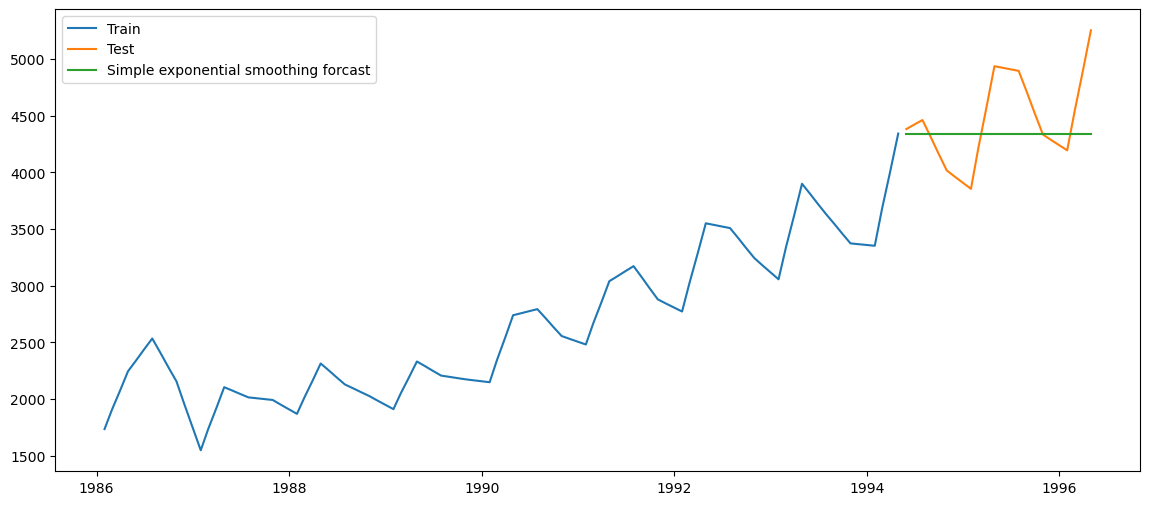

In [96]:
plt.figure(figsize=(14,6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.legend(loc='best')
plt.show()


In [97]:
dexp_model  = Holt(train_data).fit(optimized=True)
test_pred_dexp = dexp_model.forecast(24)
train_pred_dexp = dexp_model.fittedvalues
test_rmse_dexp = sqrt(mean_squared_error(test_pred_dexp,test_data.Sales))
train_rmse_dexp = sqrt(mean_squared_error(train_pred_dexp,train_data))
mape_dexp = MAPE(test_pred_dexp,test_data.Sales)
print('Simple Exponential Method Evaluation',"\n",\
'Mean Absolute Percent Error   = {}'.format(mape_dexp),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_dexp),"\n",
'Test Root Mean Squared Error  = {}'.format(test_rmse_dexp))

Simple Exponential Method Evaluation 
 Mean Absolute Percent Error   = 89.49462512277046 
 Train Root Mean Squared Error = 106.04918278537214 
 Test Root Mean Squared Error  = 4549.90795083935


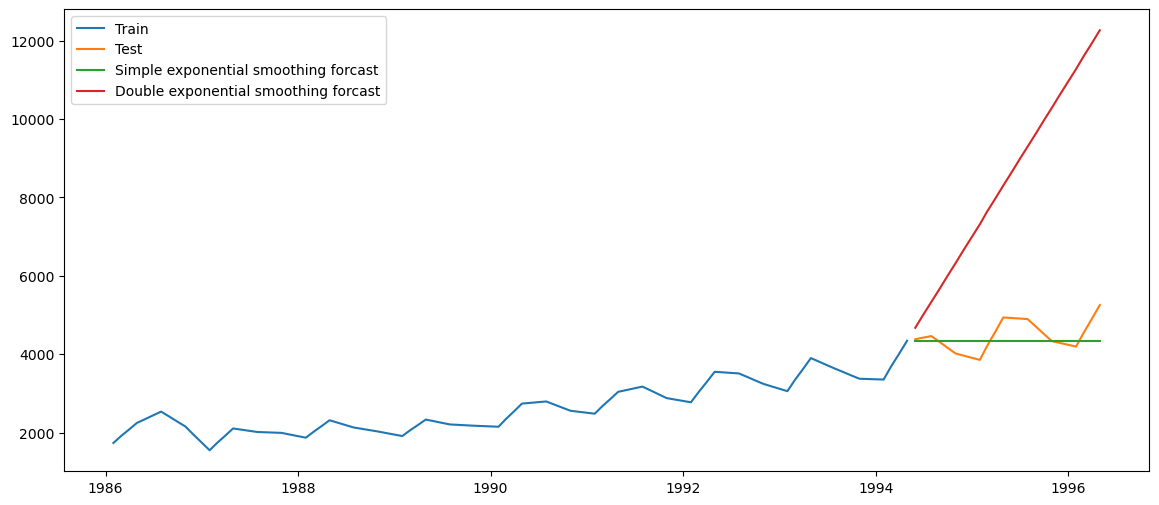

In [98]:
plt.figure(figsize=(14,6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_dexp, label='Double exponential smoothing forcast')
plt.legend(loc='best')
plt.show()

In [99]:
texp_add_model  = ExponentialSmoothing(train_data,seasonal="add",trend="add",seasonal_periods=12).fit(optimized=True)
test_pred_ad_texp = texp_add_model.forecast(24)
train_pred_ad_texp = texp_add_model.fittedvalues
test_rmse_ad_texp = sqrt(mean_squared_error(test_pred_ad_texp,test_data.Sales))
train_rmse_ad_texp = sqrt(mean_squared_error(train_pred_ad_texp,train_data))
mape_ad_texp = MAPE(test_pred_ad_texp,test_data.Sales)
print('Triple Exponential with Additive Trend and Seosonality Method Evaluation',"\n",\
'Mean Absolute Percent Error   = {}'.format(mape_ad_texp),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_ad_texp),"\n",
'Test Root Mean Squared Error  = {}'.format(test_rmse_ad_texp))

Triple Exponential with Additive Trend and Seosonality Method Evaluation 
 Mean Absolute Percent Error   = 37.82406870055411 
 Train Root Mean Squared Error = 45.97599540803602 
 Test Root Mean Squared Error  = 1938.6377946243854


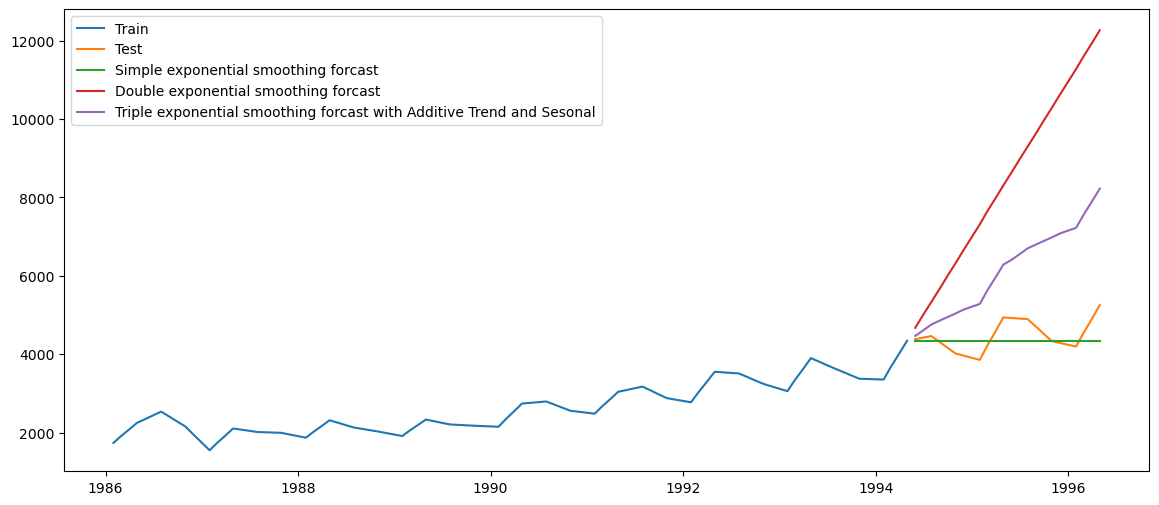

In [100]:
plt.figure(figsize=(14,6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_dexp, label='Double exponential smoothing forcast')
plt.plot(test_pred_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Sesonal')
plt.legend(loc='best')
plt.show()

In [101]:
texp_mul_ad_model  = ExponentialSmoothing(train_data,seasonal="mul",trend="add",seasonal_periods=12).fit(optimized=True)
test_pred_mul_ad_texp = texp_mul_ad_model.forecast(24)
train_pred_mul_ad_texp = texp_mul_ad_model.fittedvalues
test_rmse_mul_ad_texp = sqrt(mean_squared_error(test_pred_mul_ad_texp,test_data.Sales))
train_rmse_mul_ad_texp = sqrt(mean_squared_error(train_pred_mul_ad_texp,train_data))
mape_mul_ad_texp = MAPE(test_pred_mul_ad_texp,test_data.Sales)
print('Triple Exponential Method with Multiplicative Seasonality and Additive Trend',"\n",\
'Mean Absolute Percent Error   = {}'.format(mape_mul_ad_texp),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_mul_ad_texp),"\n",
'Test Root Mean Squared Error  = {}'.format(test_rmse_mul_ad_texp))

Triple Exponential Method with Multiplicative Seasonality and Additive Trend 
 Mean Absolute Percent Error   = 3.636542243525484 
 Train Root Mean Squared Error = 40.85891607687442 
 Test Root Mean Squared Error  = 210.00140597756265


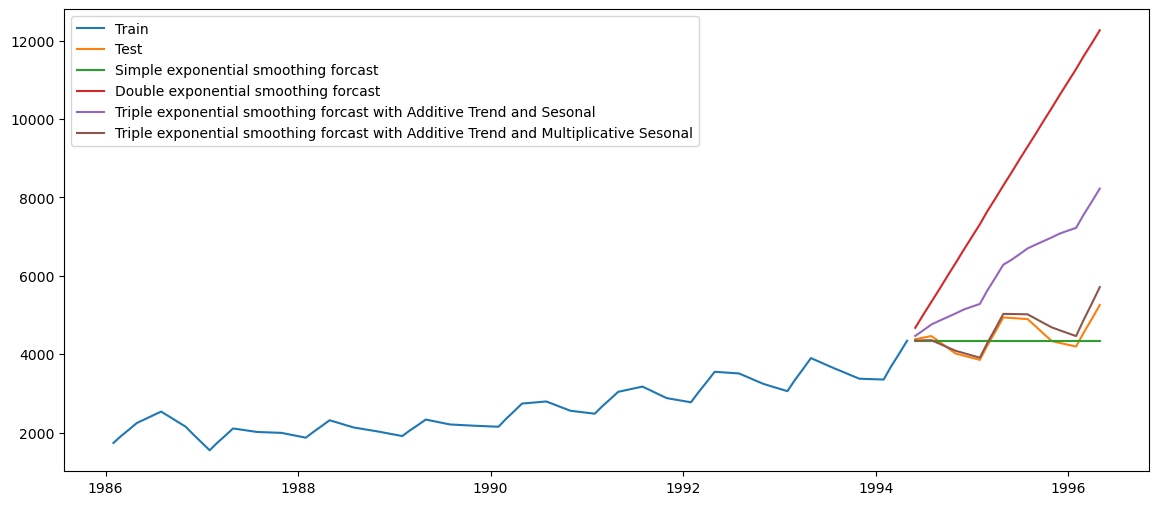

In [102]:
plt.figure(figsize=(14,6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_dexp, label='Double exponential smoothing forcast')
plt.plot(test_pred_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Sesonal')
plt.plot(test_pred_mul_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Multiplicative Sesonal')
plt.legend(loc='best')
plt.show()


In [103]:
texp_ad_mul_model  = ExponentialSmoothing(train_data,seasonal="add",trend="mul",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.5)
test_pred_ad_mul_texp  = texp_ad_mul_model.forecast(24)
train_pred_ad_mul_texp  = texp_ad_mul_model.fittedvalues
test_rmse_ad_mul_texp  = sqrt(mean_squared_error(test_pred_ad_mul_texp ,test_data.Sales))
train_rmse_ad_mul_texp  = sqrt(mean_squared_error(train_pred_ad_mul_texp ,train_data))
mape_ad_mul_texp  = MAPE(test_pred_ad_mul_texp,test_data.Sales)
print('Triple Exponential Method with Additive Seasonality and Multiplicative Trend',"\n",\
'Mean Absolute Percent Error   = {}'.format(mape_ad_mul_texp ),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_ad_mul_texp ),"\n",
'Test Root Mean Squared Error  = {}'.format(test_rmse_ad_mul_texp ))

Triple Exponential Method with Additive Seasonality and Multiplicative Trend 
 Mean Absolute Percent Error   = 5.227066115525063 
 Train Root Mean Squared Error = 169.71546347942615 
 Test Root Mean Squared Error  = 270.84004809136763


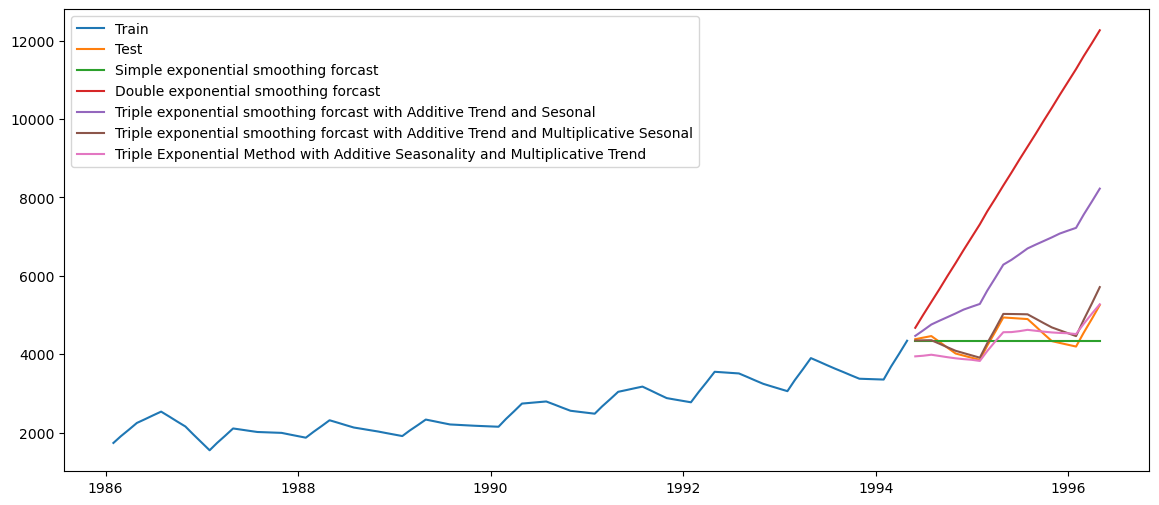

In [104]:
plt.figure(figsize=(14,6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_dexp, label='Double exponential smoothing forcast')
plt.plot(test_pred_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Sesonal')
plt.plot(test_pred_mul_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Multiplicative Sesonal')
plt.plot(test_pred_ad_mul_texp, label='Triple Exponential Method with Additive Seasonality and Multiplicative Trend')
plt.legend(loc='best')
plt.show()


In [105]:
texp_mul_model  = ExponentialSmoothing(train_data,seasonal="mul",trend="mul",seasonal_periods=12).fit(optimized=True)
test_pred_mul_texp  = texp_mul_model.forecast(24)
train_pred_mul_texp  = texp_mul_model.fittedvalues
test_rmse_mul_texp  = sqrt(mean_squared_error(test_pred_mul_texp ,test_data.Sales))
train_rmse_mul_texp  = sqrt(mean_squared_error(train_pred_mul_texp ,train_data))
mape_mul_texp  = MAPE(test_pred_mul_texp,test_data.Sales)
print('Triple Exponential Method with multiplicative Trend and Seasonality',"\n",\
'Mean Absolute Percent Error   = {}'.format(mape_mul_texp ),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_mul_texp ),"\n",
'Test Root Mean Squared Error  = {}'.format(test_rmse_mul_texp ))

Triple Exponential Method with multiplicative Trend and Seasonality 
 Mean Absolute Percent Error   = 6.308444220296387 
 Train Root Mean Squared Error = 40.06681930340377 
 Test Root Mean Squared Error  = 366.46433545020244


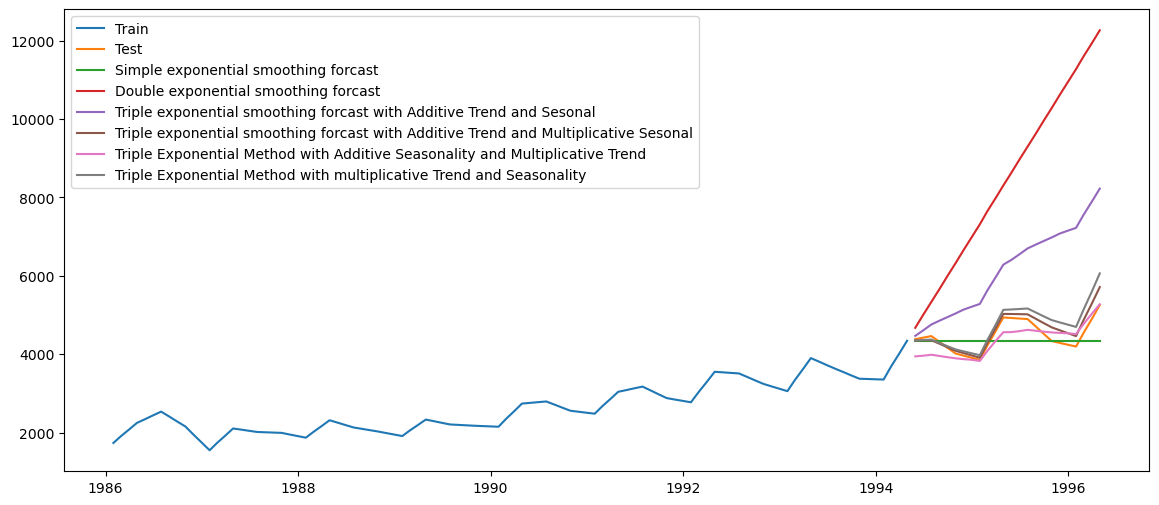

In [106]:
plt.figure(figsize=(14,6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_dexp, label='Double exponential smoothing forcast')
plt.plot(test_pred_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Sesonal')
plt.plot(test_pred_mul_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Multiplicative Sesonal')
plt.plot(test_pred_ad_mul_texp, label='Triple Exponential Method with Additive Seasonality and Multiplicative Trend')
plt.plot(test_pred_mul_texp, label='Triple Exponential Method with multiplicative Trend and Seasonality')
plt.legend(loc='best')
plt.show()

In [107]:
Evaluation = {"Models":pd.Series(["Simple_Exp","Double_Exp","Triple_Exp_Add","Triple_Exp_Mul_Add","Triple_Exp_Add_Mul","Triple_Exp_Mul"]),
        "Train_RMSE":pd.Series([train_rmse_ses,train_rmse_dexp,train_rmse_ad_texp,train_rmse_mul_ad_texp,train_rmse_ad_mul_texp,train_rmse_mul_texp]),
        "Test_MAPE(%)":pd.Series([mape_ses,mape_dexp,mape_ad_texp,mape_mul_ad_texp,mape_ad_mul_texp,mape_mul_texp]),
        "Test_RMSE_Values":pd.Series([test_rmse_ses,test_rmse_dexp,test_rmse_ad_texp,test_rmse_mul_ad_texp,test_rmse_ad_mul_texp,test_rmse_mul_texp])}
table_evaluation=pd.DataFrame(Evaluation)
table_evaluation.sort_values(['Test_MAPE(%)'], inplace=True, ignore_index=True)
table_evaluation

Models  Train_RMSE  Test_MAPE(%)  Test_RMSE_Values
0  Triple_Exp_Mul_Add   40.858916      3.636542        210.001406
1  Triple_Exp_Add_Mul  169.715463      5.227066        270.840048
2      Triple_Exp_Mul   40.066819      6.308444        366.464335
3          Simple_Exp  129.784147      6.620374        382.447742
4      Triple_Exp_Add   45.975995     37.824069       1938.637795
5          Double_Exp  106.049183     89.494625       4549.907951

(array([   0., 1000., 2000., 3000., 4000., 5000.]),
 [Text(0.0, 0, '0'),
  Text(1000.0, 0, '1000'),
  Text(2000.0, 0, '2000'),
  Text(3000.0, 0, '3000'),
  Text(4000.0, 0, '4000'),
  Text(5000.0, 0, '5000')])

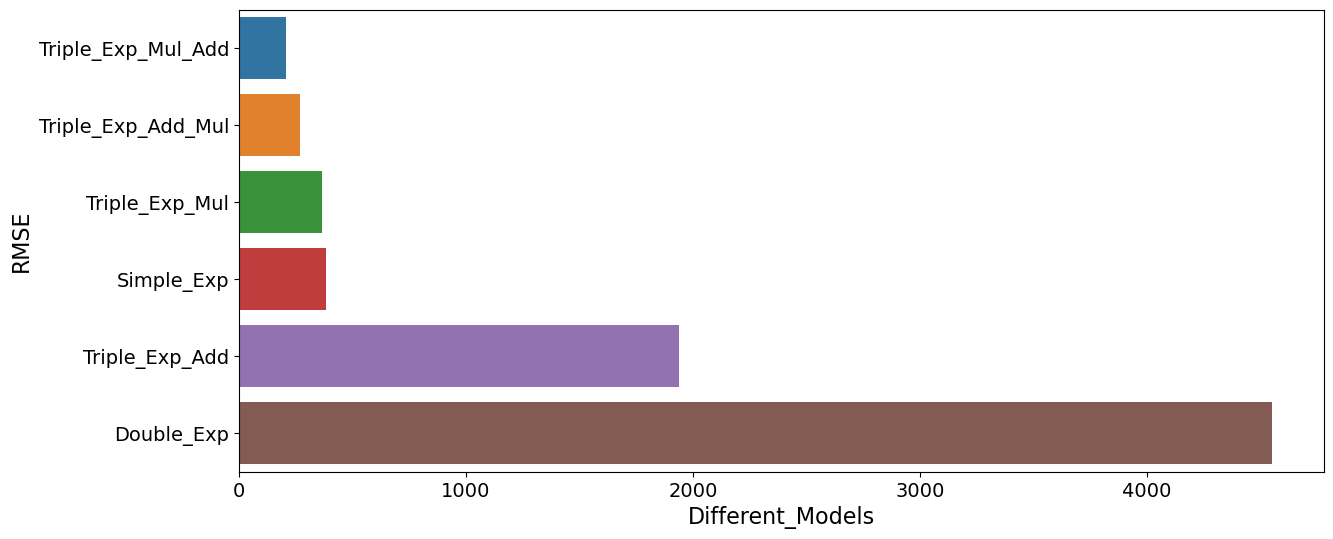

In [108]:
f, axe = plt.subplots(1,1, figsize=(14,6))
sns.barplot(x='Test_RMSE_Values', y='Models', data=table_evaluation, ax = axe)
axe.set_xlabel('Different_Models', size=16)
axe.set_ylabel('RMSE', size=16)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)


Text(0, 0.5, 'Different_Models')

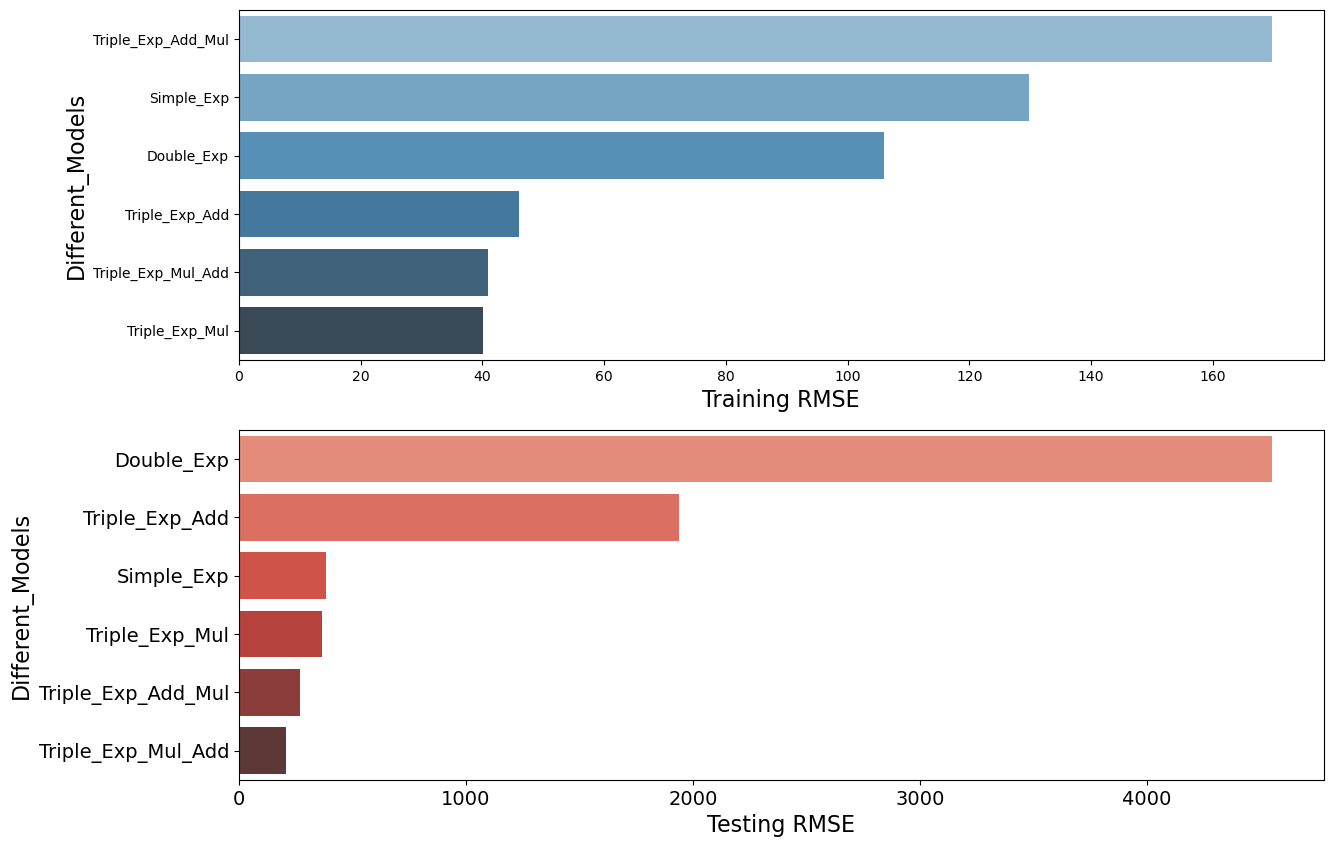

In [109]:
f, axes = plt.subplots(2,1, figsize=(14,10))
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

train_rmse = table_evaluation.sort_values(by=['Train_RMSE'], ascending=False)

sns.barplot(x='Train_RMSE', y='Models', data = train_rmse, palette='Blues_d', ax = axes[0])
axes[0].set_xlabel('Training RMSE', size=16)
axes[0].set_ylabel('Different_Models', size=16)

test_rmse = table_evaluation.sort_values(by=['Test_RMSE_Values'], ascending=False)

sns.barplot(x='Test_RMSE_Values', y='Models', data = test_rmse, palette='Reds_d', ax = axes[1])
axes[1].set_xlabel('Testing RMSE', size=16)
axes[1].set_ylabel('Different_Models', size=16)



In [110]:
def test_stationarity(timeseries):
    
    # Determine rolling statistics
    movingAverage = timeseries.rolling(window=4).mean()
    movingSTD = timeseries.rolling(window=4).std()
    
    # Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show(block=False)
    
    # Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['Sales'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

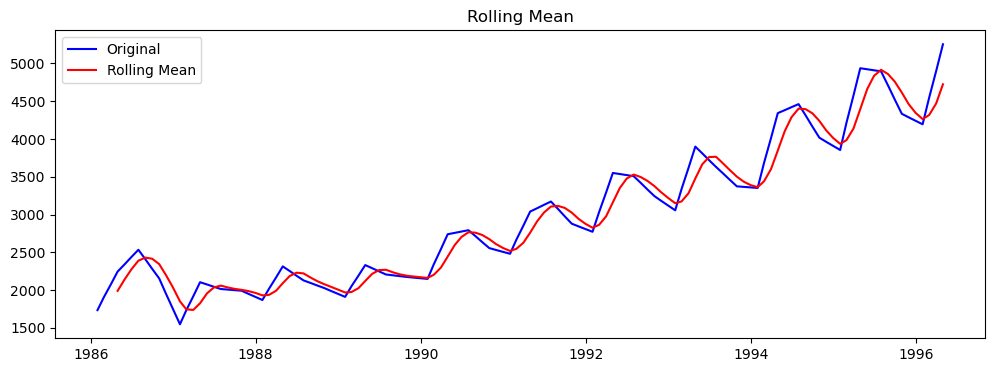

Results of Dickey Fuller Test:
Test Statistic                   0.572599
p-value                          0.986920
#Lags Used                      10.000000
Number of Observations Used    113.000000
Critical Value (1%)             -3.489590
Critical Value (5%)             -2.887477
Critical Value (10%)            -2.580604
dtype: float64


In [111]:
plt.figure(figsize=(12,4))
sales= pd.DataFrame()
sales['Sales'] = interpolated_month[['Sales']]
test_stationarity(sales)


In [112]:
def adf_test(series):    
    result = adfuller(series.dropna())  
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    if result[1] <= 0.05:
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

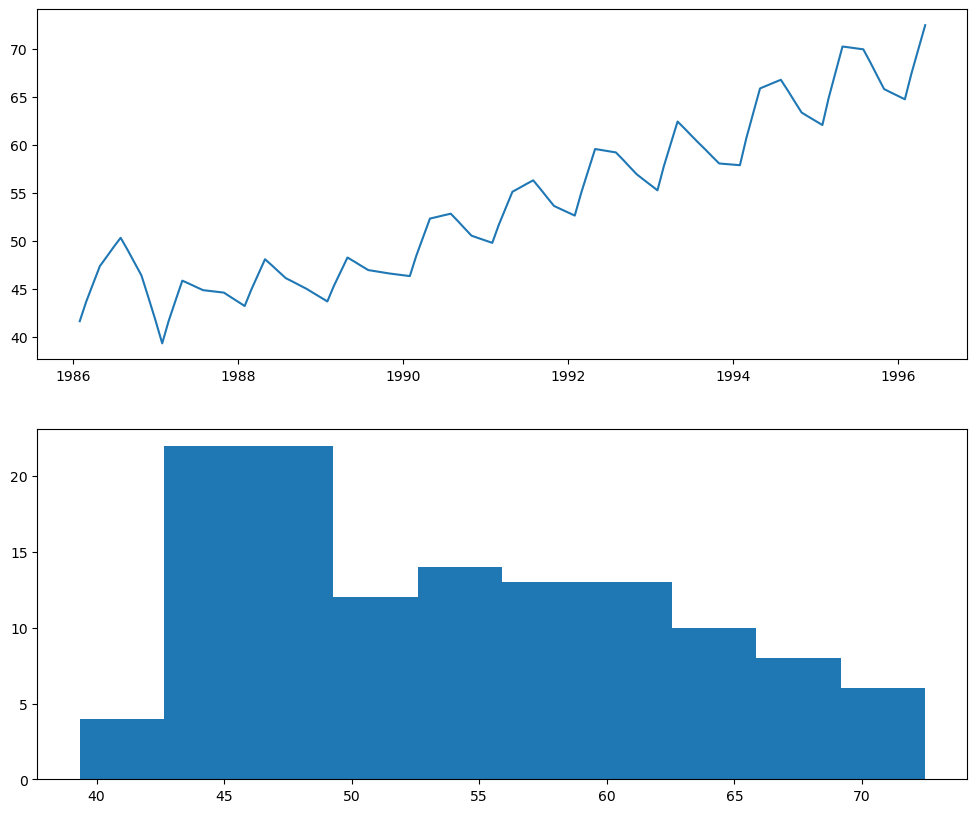

In [113]:
square_root = pd.DataFrame()
square_root = interpolated_month[['Sales']]
square_root['Sales'] = np.sqrt(square_root.Sales)

# line chart
fig=plt.figure(figsize=(12,10))
plt.subplot(211)
plt.plot(square_root['Sales'])

# Histogram
plt.subplot(212)
plt.hist(square_root['Sales'])
plt.show()

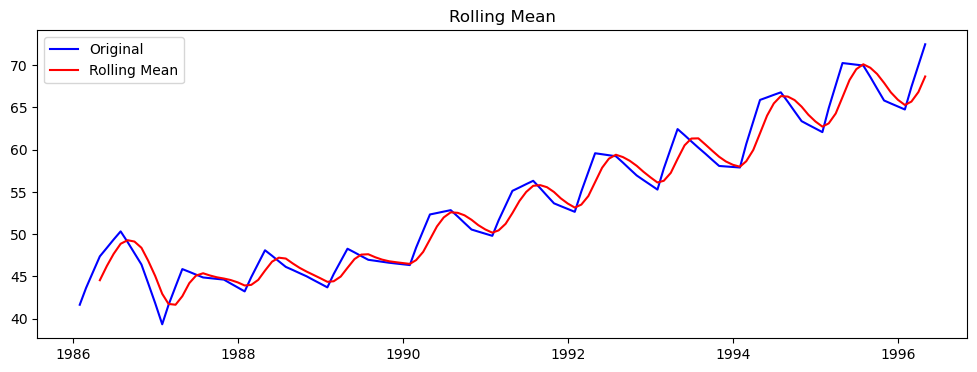

Results of Dickey Fuller Test:
Test Statistic                   0.728012
p-value                          0.990381
#Lags Used                      13.000000
Number of Observations Used    110.000000
Critical Value (1%)             -3.491245
Critical Value (5%)             -2.888195
Critical Value (10%)            -2.580988
dtype: float64


In [114]:
plt.figure(figsize=(12,4))
test_stationarity(square_root)

In [115]:
adf_test(square_root.Sales)

Fail to reject the null hypothesis
Data is non-stationary


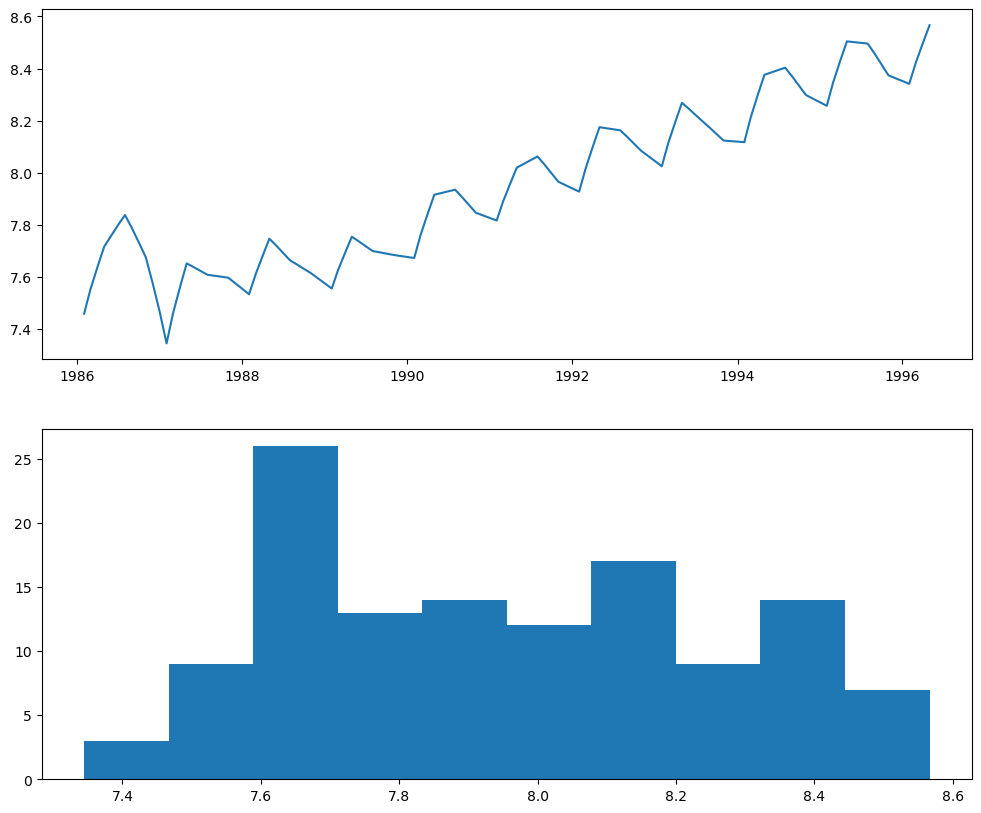

In [116]:
log = pd.DataFrame()
log = interpolated_month[['Sales']]
log['Sales'] = np.log(log.Sales)

# line chart
fig=plt.figure(figsize=(12,10))
plt.subplot(211)
plt.plot(log['Sales'])

# Histogram
plt.subplot(212)
plt.hist(log['Sales'])
plt.show()

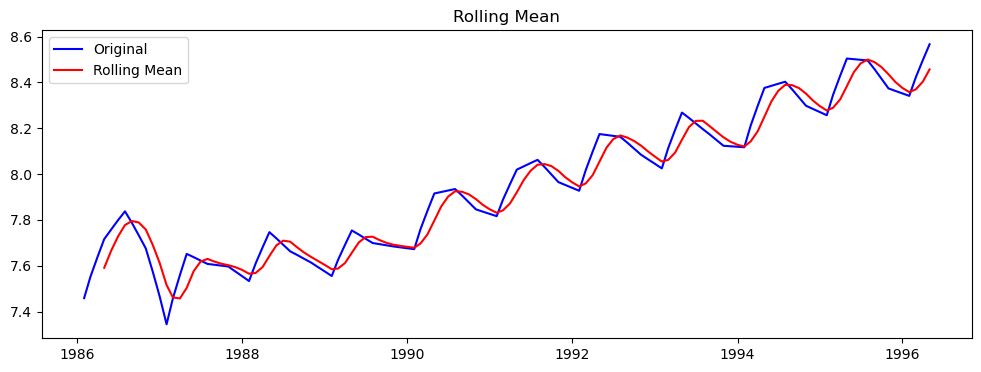

Results of Dickey Fuller Test:
Test Statistic                   0.451508
p-value                          0.983322
#Lags Used                      13.000000
Number of Observations Used    110.000000
Critical Value (1%)             -3.491245
Critical Value (5%)             -2.888195
Critical Value (10%)            -2.580988
dtype: float64


In [117]:
plt.figure(figsize=(12,4))
test_stationarity(log)

In [118]:
adf_test(log.Sales)

Fail to reject the null hypothesis
Data is non-stationary


Sales
Date                
1986-01-31  7.458663
1986-02-28  7.552170
1986-03-31  7.637676
1986-04-30  7.716443
1986-05-31  7.758437

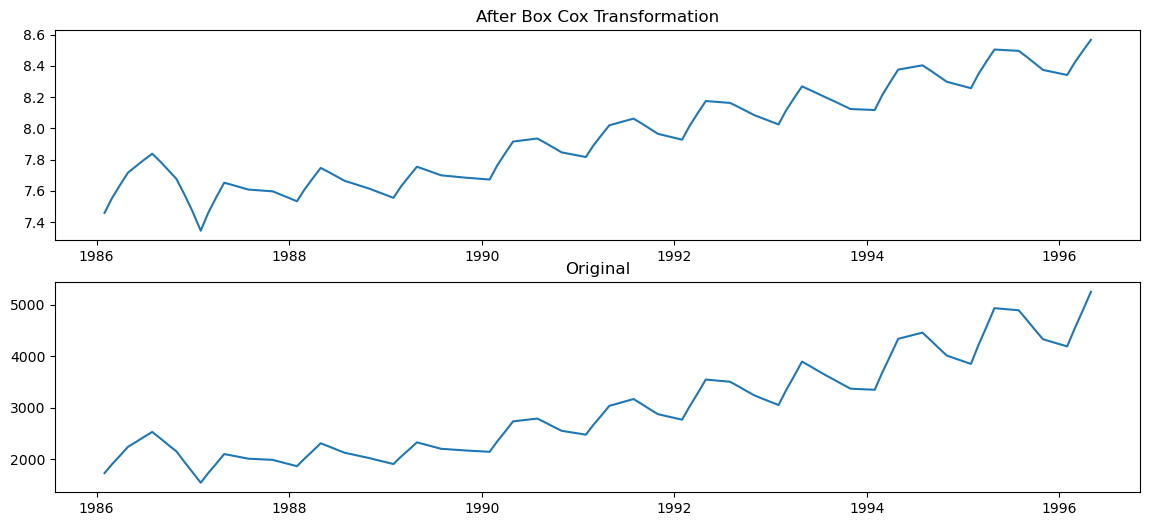

In [119]:
data_boxcox = pd.DataFrame()
data_boxcox['Sales'] = pd.Series(boxcox(interpolated_month['Sales'], lmbda=0), interpolated_month.index)
display(data_boxcox.head())
fig, axis = plt.subplots(2,figsize=(14,6),)
axis[0].plot(data_boxcox)
axis[0].set_title('After Box Cox Transformation')
axis[1].plot(interpolated_month, label='original')
axis[1].set_title('Original')
plt.show()

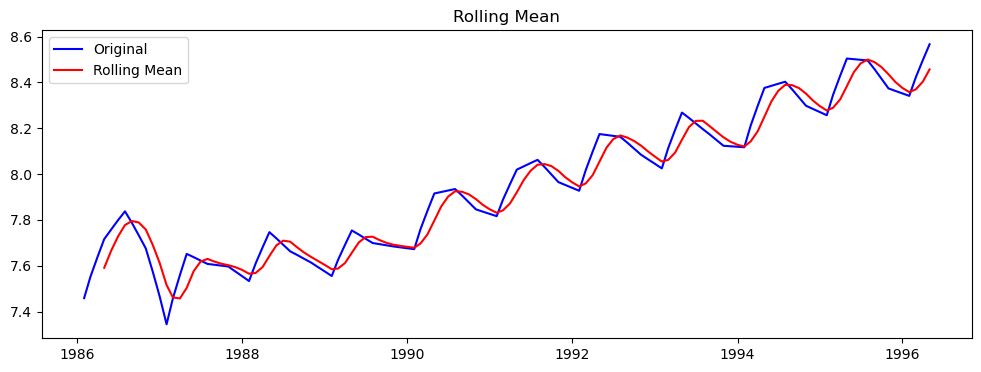

Results of Dickey Fuller Test:
Test Statistic                   0.451508
p-value                          0.983322
#Lags Used                      13.000000
Number of Observations Used    110.000000
Critical Value (1%)             -3.491245
Critical Value (5%)             -2.888195
Critical Value (10%)            -2.580988
dtype: float64


In [120]:
plt.figure(figsize=(12,4))
test_stationarity(data_boxcox)

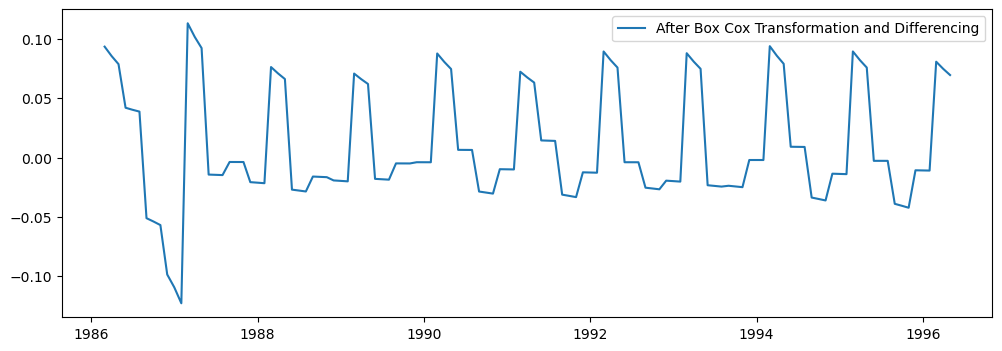

In [121]:
data_boxcox_diff = data_boxcox - data_boxcox.shift()
data_boxcox_diff.dropna(inplace=True)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox Transformation and Differencing')
plt.legend(loc='best')
plt.show()

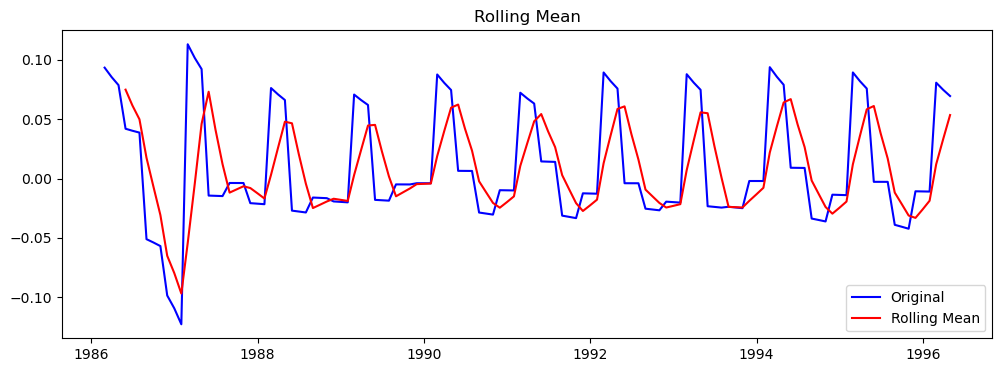

Results of Dickey Fuller Test:
Test Statistic                  -3.030060
p-value                          0.032181
#Lags Used                      12.000000
Number of Observations Used    110.000000
Critical Value (1%)             -3.491245
Critical Value (5%)             -2.888195
Critical Value (10%)            -2.580988
dtype: float64


In [122]:
plt.figure(figsize=(12,4))
test_stationarity(data_boxcox_diff)

In [123]:
adf_test(data_boxcox_diff.Sales)

Reject the null hypothesis
Data is stationary


In [124]:
train_data_boxcox = data_boxcox[:100]
test_data_boxcox = data_boxcox[100:]
train_data_boxcox_diff = data_boxcox_diff[:99]
test_data_boxcox_diff = data_boxcox_diff[99:]

In [125]:
def evaluate_arima_model(X, arima_order):

# Prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.70)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]

# Make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
        
# Calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

# Evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                except Exception as e:
                    print(e)
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))


In [126]:
# Evaluate parameters
p_values = range(0,5)
d_values = range(0,5)
q_values = range(0,5)
evaluate_models(train_data_boxcox_diff.Sales, p_values, d_values, q_values)

Best ARIMA(3, 0, 2) RMSE=0.028


In [127]:
model = ARIMA(train_data_boxcox_diff, order=(3, 0, 2))
model_fit = model.fit()
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['arima_forecast'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())

# We did differencing. So we need to revert it by adding the consecutive observations.
# For that we are using cumsum() method
y_hat_ar['arima_forecast'] = y_hat_ar['arima_forecast'].cumsum()

# We removed the first observations after differencing as it was null. Hence, adding the first observation back.
y_hat_ar['arima_forecast'] = y_hat_ar['arima_forecast'].add(data_boxcox.Sales[0])

# Now doing the reverse transformation 
# We have done Box Cox Log Log transformation with lambda = 0
# Hence, we have to the exponential as it is the reverse of the log.
y_hat_ar['arima_forecast'] = np.exp(y_hat_ar['arima_forecast'])

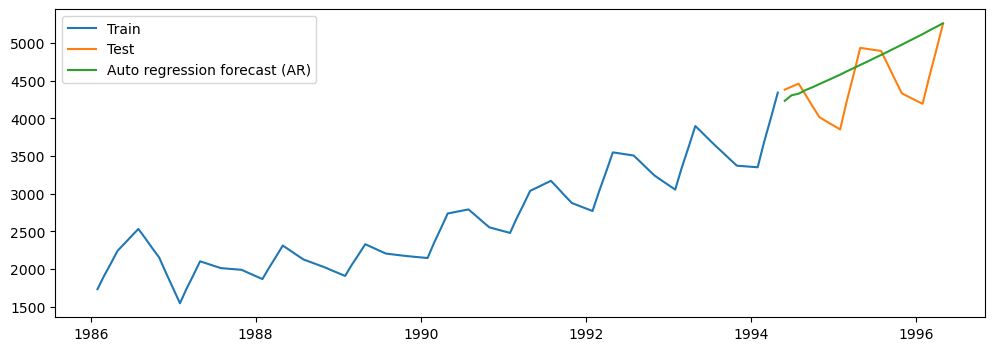

In [128]:
plt.figure(figsize=(12,4))
plt.plot(train_data['Sales'], label='Train')
plt.plot(test_data, label='Test')
plt.plot(y_hat_ar['arima_forecast'][test_data.index.min():], label='Auto regression forecast (AR)')
plt.legend(loc='best')
plt.show()

In [129]:
rmse_arima = np.sqrt(mean_squared_error(test_data.Sales, y_hat_ar['arima_forecast'][test_data.index.min():])).round(2)
rmse_arima

455.43

In [130]:
model_residual = model_fit.resid
model_residual.mean()

0.00022590888940869565

In [131]:
adf_test(model_residual)

Reject the null hypothesis
Data is stationary


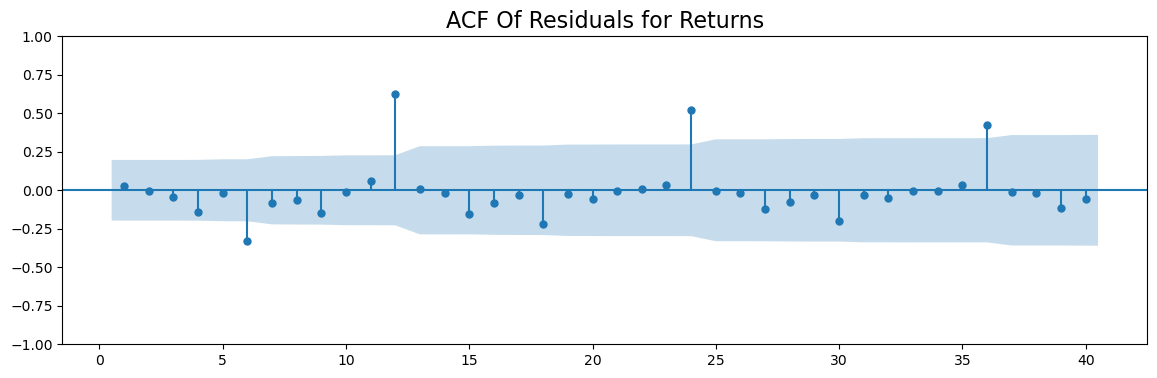

In [132]:
plt.rcParams["figure.figsize"] = (14,4)
plot_acf(model_residual, zero = False, lags = 40)
plt.title("ACF Of Residuals for Returns",size=16)
plt.show()

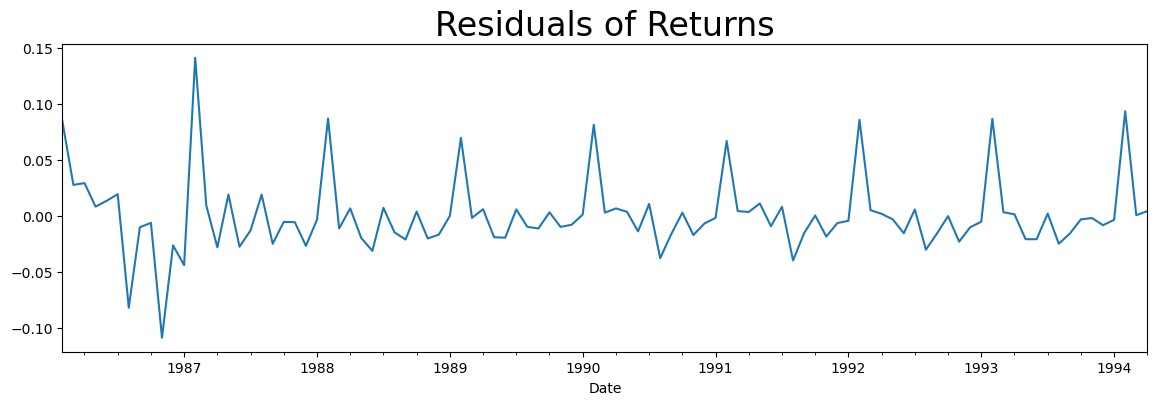

In [133]:
model_residual.plot(figsize=(14,4))
plt.title("Residuals of Returns", size=24)
plt.show()

In [134]:
model = SARIMAX(train_data_boxcox, order=(1,1,1), seasonal_order=(1,1,1,12))
model_fit= model.fit()
y_hat_sarima = data_boxcox_diff.copy()

In [135]:
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

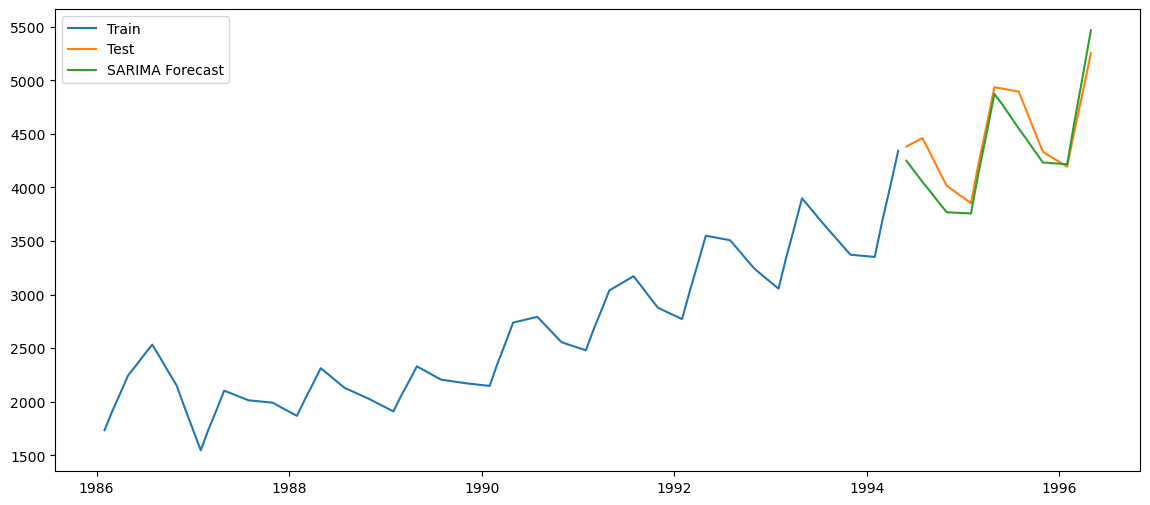

In [136]:
plt.figure(figsize=(14,6))
plt.plot(train_data['Sales'], label='Train')
plt.plot(test_data, label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test_data.index.min():], label='SARIMA Forecast')
plt.legend(loc='best')
plt.show()

In [137]:
rmse_sarima = np.sqrt(mean_squared_error(test_data, y_hat_sarima['sarima_forecast'][test_data.index.min():])).round(2)
rmse_sarima

205.68

In [138]:
mape_sarima = round(np.mean(np.abs((test_data.Sales - y_hat_sarima['sarima_forecast'][test_data.index.min():])/test_data.Sales)*100),2)
mape_sarima

3.94

In [139]:
model_residual = model_fit.resid
model_residual.mean()

0.03705353177693023

In [140]:
adf_test(model_residual)

Reject the null hypothesis
Data is stationary


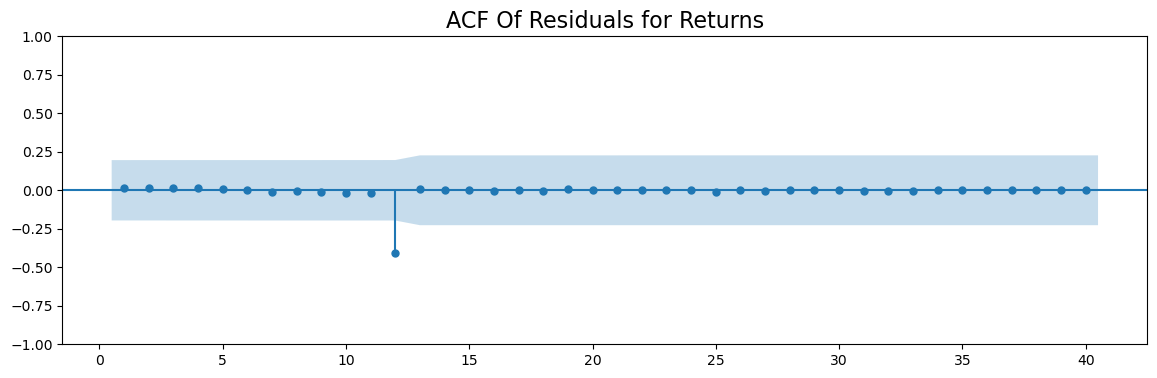

In [141]:
plot_acf(model_residual, zero = False, lags = 40)
plt.title("ACF Of Residuals for Returns",size=16)
plt.show()

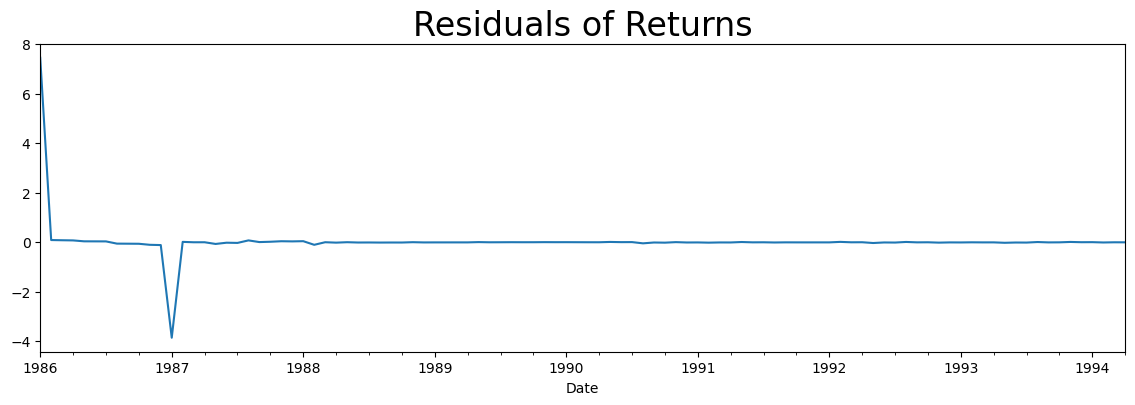

In [142]:
model_residual.plot(figsize=(14,4))
plt.title("Residuals of Returns", size=24)
plt.show()

In [143]:
Evaluation = {"Models":pd.Series(["Simple_Exp","Double_Exp","Triple_Exp_Add","Triple_Exp_Mul_Add","Triple_Exp_Add_Mul","Triple_Exp_Mul"]),
        "Train_RMSE":pd.Series([train_rmse_ses,train_rmse_dexp,train_rmse_ad_texp,train_rmse_mul_ad_texp,train_rmse_ad_mul_texp,train_rmse_mul_texp]),
        "Test_MAPE(%)":pd.Series([mape_ses,mape_dexp,mape_ad_texp,mape_mul_ad_texp,mape_ad_mul_texp,mape_mul_texp]),
        "Test_RMSE_Values":pd.Series([test_rmse_ses,test_rmse_dexp,test_rmse_ad_texp,test_rmse_mul_ad_texp,test_rmse_ad_mul_texp,test_rmse_mul_texp])}
table_evaluation=pd.DataFrame(Evaluation)
table_evaluation.sort_values(['Test_MAPE(%)'], inplace=True, ignore_index=True)
table_evaluation

Models  Train_RMSE  Test_MAPE(%)  Test_RMSE_Values
0  Triple_Exp_Mul_Add   40.858916      3.636542        210.001406
1  Triple_Exp_Add_Mul  169.715463      5.227066        270.840048
2      Triple_Exp_Mul   40.066819      6.308444        366.464335
3          Simple_Exp  129.784147      6.620374        382.447742
4      Triple_Exp_Add   45.975995     37.824069       1938.637795
5          Double_Exp  106.049183     89.494625       4549.907951

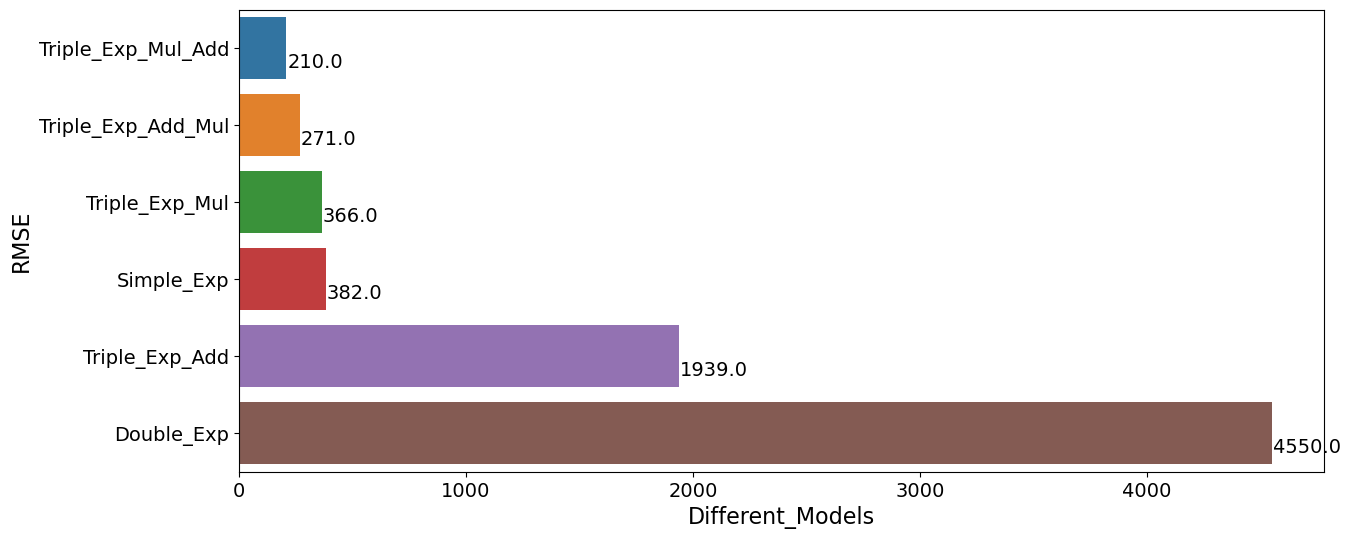

In [144]:
f, axe = plt.subplots(1,1, figsize=(14,6))
sns.barplot(x='Test_RMSE_Values', y='Models', data=table_evaluation, ax = axe)
axe.set_xlabel('Different_Models', size=16)
axe.set_ylabel('RMSE', size=16)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

for i, v in enumerate(np.round(table_evaluation.Test_RMSE_Values.values,0)):
    axe.text(v + 3, i + .25, str(v), fontsize= 14)
plt.show()


In [145]:
interpolated_month.reset_index(inplace=True)
interpolated_month['t'] = np.arange(1,len(interpolated_month)+1)
interpolated_month['t_squared'] = np.square(interpolated_month.t)
interpolated_month["month"] = interpolated_month.Date.dt.strftime("%b") # month extraction
interpolated_month["year"] = interpolated_month.Date.dt.strftime("%Y") # year extraction
months = pd.get_dummies(interpolated_month['month'])
months = months[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]
cocacola = pd.concat([interpolated_month,months],axis=1)
cocacola['log_sales'] = np.log(cocacola['Sales'])
cocacola

Date        Sales    t  t_squared month  year  Jan  Feb  Mar  Apr  \
0   1986-01-31  1734.827000    1          1   Jan  1986    1    0    0    0   
1   1986-02-28  1904.871666    2          4   Feb  1986    0    1    0    0   
2   1986-03-31  2074.916332    3          9   Mar  1986    0    0    1    0   
3   1986-04-30  2244.960999    4         16   Apr  1986    0    0    0    1   
4   1986-05-31  2341.242330    5         25   May  1986    0    0    0    0   
..         ...          ...  ...        ...   ...   ...  ...  ...  ...  ...   
119 1995-12-31  4240.333333  120      14400   Dec  1995    0    0    0    0   
120 1996-01-31  4194.000000  121      14641   Jan  1996    1    0    0    0   
121 1996-02-29  4547.000000  122      14884   Feb  1996    0    1    0    0   
122 1996-03-31  4900.000000  123      15129   Mar  1996    0    0    1    0   
123 1996-04-30  5253.000000  124      15376   Apr  1996    0    0    0    1   

     May  Jun  Jul  Aug  Sep  Oct  Nov  Dec  log_sales  
0      0    0    0    0    0    0    0    0   7.458663  
1      0    0    0    0    0    0    0    0   7.552170  
2      0    0    0    0    0    0    0    0   7.637676  
3      0    0    0    0    0    0    0    0   7.716443  
4      1    0    0    0    0    0    0    0   7.758437  
..   ...  ...  ...  ...  ...  ...  ...  ...        ...  
119    0    0    0    0    0    0    0    1   8.352397  
120    0    0    0    0    0    0    0    0   8.341410  
121    0    0    0    0    0    0    0    0   8.422223  
122    0    0    0    0    0    0    0    0   8.496990  
123    0    0    0    0    0    0    0    0   8.566555  

[124 rows x 19 columns]

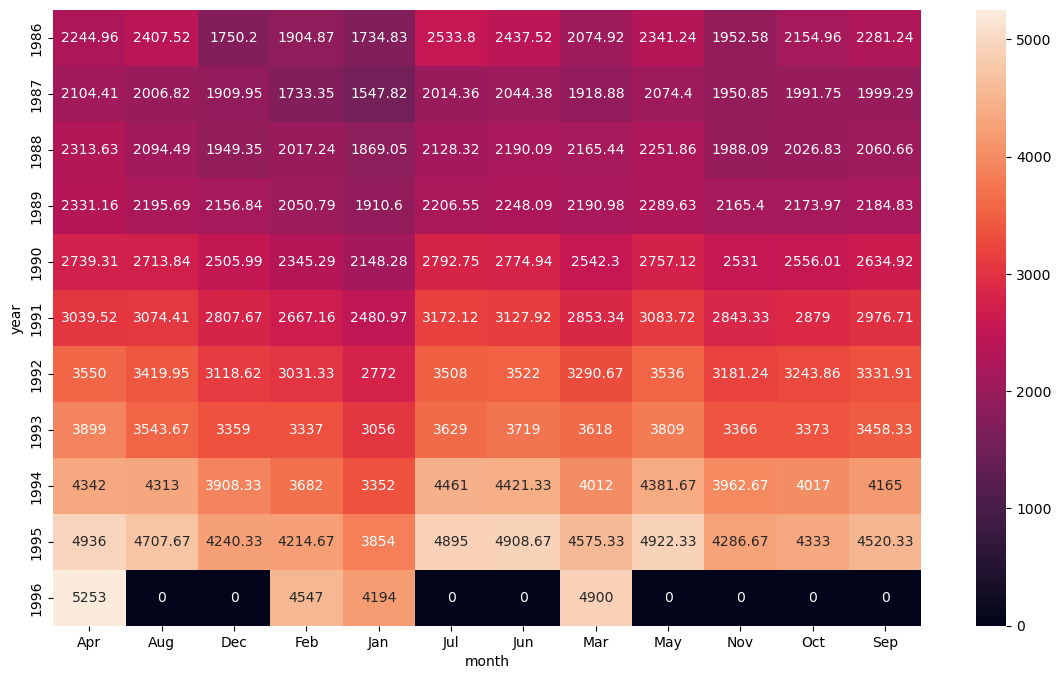

In [146]:
plt.figure(figsize=(14,8))
heatmap_y_month = pd.pivot_table(data=cocacola,values="Sales",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")
plt.show()

In [147]:
size = 100

train_data = cocacola.iloc[:size]
test_data = cocacola.iloc[size:]

In [148]:
train_data

Date        Sales    t  t_squared month  year  Jan  Feb  Mar  Apr  \
0  1986-01-31  1734.827000    1          1   Jan  1986    1    0    0    0   
1  1986-02-28  1904.871666    2          4   Feb  1986    0    1    0    0   
2  1986-03-31  2074.916332    3          9   Mar  1986    0    0    1    0   
3  1986-04-30  2244.960999    4         16   Apr  1986    0    0    0    1   
4  1986-05-31  2341.242330    5         25   May  1986    0    0    0    0   
..        ...          ...  ...        ...   ...   ...  ...  ...  ...  ...   
95 1993-12-31  3359.000000   96       9216   Dec  1993    0    0    0    0   
96 1994-01-31  3352.000000   97       9409   Jan  1994    1    0    0    0   
97 1994-02-28  3682.000000   98       9604   Feb  1994    0    1    0    0   
98 1994-03-31  4012.000000   99       9801   Mar  1994    0    0    1    0   
99 1994-04-30  4342.000000  100      10000   Apr  1994    0    0    0    1   

    May  Jun  Jul  Aug  Sep  Oct  Nov  Dec  log_sales  
0     0    0    0    0    0    0    0    0   7.458663  
1     0    0    0    0    0    0    0    0   7.552170  
2     0    0    0    0    0    0    0    0   7.637676  
3     0    0    0    0    0    0    0    0   7.716443  
4     1    0    0    0    0    0    0    0   7.758437  
..  ...  ...  ...  ...  ...  ...  ...  ...        ...  
95    0    0    0    0    0    0    0    1   8.119399  
96    0    0    0    0    0    0    0    0   8.117312  
97    0    0    0    0    0    0    0    0   8.211211  
98    0    0    0    0    0    0    0    0   8.297045  
99    0    0    0    0    0    0    0    0   8.376090  

[100 rows x 19 columns]

In [149]:
test_data

Date        Sales    t  t_squared month  year  Jan  Feb  Mar  Apr  \
100 1994-05-31  4381.666667  101      10201   May  1994    0    0    0    0   
101 1994-06-30  4421.333333  102      10404   Jun  1994    0    0    0    0   
102 1994-07-31  4461.000000  103      10609   Jul  1994    0    0    0    0   
103 1994-08-31  4313.000000  104      10816   Aug  1994    0    0    0    0   
104 1994-09-30  4165.000000  105      11025   Sep  1994    0    0    0    0   
105 1994-10-31  4017.000000  106      11236   Oct  1994    0    0    0    0   
106 1994-11-30  3962.666667  107      11449   Nov  1994    0    0    0    0   
107 1994-12-31  3908.333333  108      11664   Dec  1994    0    0    0    0   
108 1995-01-31  3854.000000  109      11881   Jan  1995    1    0    0    0   
109 1995-02-28  4214.666667  110      12100   Feb  1995    0    1    0    0   
110 1995-03-31  4575.333333  111      12321   Mar  1995    0    0    1    0   
111 1995-04-30  4936.000000  112      12544   Apr  1995    0    0    0    1   
112 1995-05-31  4922.333333  113      12769   May  1995    0    0    0    0   
113 1995-06-30  4908.666667  114      12996   Jun  1995    0    0    0    0   
114 1995-07-31  4895.000000  115      13225   Jul  1995    0    0    0    0   
115 1995-08-31  4707.666667  116      13456   Aug  1995    0    0    0    0   
116 1995-09-30  4520.333333  117      13689   Sep  1995    0    0    0    0   
117 1995-10-31  4333.000000  118      13924   Oct  1995    0    0    0    0   
118 1995-11-30  4286.666667  119      14161   Nov  1995    0    0    0    0   
119 1995-12-31  4240.333333  120      14400   Dec  1995    0    0    0    0   
120 1996-01-31  4194.000000  121      14641   Jan  1996    1    0    0    0   
121 1996-02-29  4547.000000  122      14884   Feb  1996    0    1    0    0   
122 1996-03-31  4900.000000  123      15129   Mar  1996    0    0    1    0   
123 1996-04-30  5253.000000  124      15376   Apr  1996    0    0    0    1   

     May  Jun  Jul  Aug  Sep  Oct  Nov  Dec  log_sales  
100    1    0    0    0    0    0    0    0   8.385184  
101    0    1    0    0    0    0    0    0   8.394197  
102    0    0    1    0    0    0    0    0   8.403128  
103    0    0    0    1    0    0    0    0   8.369389  
104    0    0    0    0    1    0    0    0   8.334472  
105    0    0    0    0    0    1    0    0   8.298291  
106    0    0    0    0    0    0    1    0   8.284672  
107    0    0    0    0    0    0    0    1   8.270866  
108    0    0    0    0    0    0    0    0   8.256867  
109    0    0    0    0    0    0    0    0   8.346326  
110    0    0    0    0    0    0    0    0   8.428435  
111    0    0    0    0    0    0    0    0   8.504311  
112    1    0    0    0    0    0    0    0   8.501538  
113    0    1    0    0    0    0    0    0   8.498758  
114    0    0    1    0    0    0    0    0   8.495970  
115    0    0    0    1    0    0    0    0   8.456948  
116    0    0    0    0    1    0    0    0   8.416341  
117    0    0    0    0    0    1    0    0   8.374015  
118    0    0    0    0    0    0    1    0   8.363265  
119    0    0    0    0    0    0    0    1   8.352397  
120    0    0    0    0    0    0    0    0   8.341410  
121    0    0    0    0    0    0    0    0   8.422223  
122    0    0    0    0    0    0    0    0   8.496990  
123    0    0    0    0    0    0    0    0   8.566555

In [150]:
linear_model = smf.ols('Sales~t',data=train_data).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(test_data['t'])))
rmse_linear = np.sqrt(np.mean((np.array(test_data['Sales'])-np.array(pred_linear))**2))
rmse_linear

686.8740863668943

In [151]:
exp = smf.ols('log_sales~t',data=train_data).fit()
pred_exp = pd.Series(exp.predict(pd.DataFrame(test_data['t'])))
rmse_exp = np.sqrt(np.mean((np.array(test_data['Sales'])-np.array(np.exp(pred_exp)))**2))
rmse_exp

530.3268025099009

In [152]:
quad = smf.ols('Sales~t+t_squared',data=train_data).fit()
pred_quad = pd.Series(quad.predict(test_data[["t","t_squared"]]))
rmse_quad = np.sqrt(np.mean((np.array(test_data['Sales'])-np.array(pred_quad))**2))
rmse_quad

371.2941834498655

In [153]:
add_sea = smf.ols('Sales~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train_data).fit()
pred_add_sea = pd.Series(add_sea.predict(test_data[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test_data['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1837.7879723483786

In [154]:
add_sea_quad = smf.ols('Sales~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train_data).fit()
pred_add_sea_quad = pd.Series(add_sea_quad.predict(test_data[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test_data['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

225.80498810366163

In [155]:
mul_sea = smf.ols('log_sales~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = train_data).fit()
pred_mult_sea = pd.Series(mul_sea.predict(test_data))
rmse_mult_sea = np.sqrt(np.mean((np.array(test_data['Sales'])-np.array(np.exp(pred_mult_sea)))**2))
rmse_mult_sea

1904.7944171920328

In [156]:
mul_add_sea = smf.ols('log_sales~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = train_data).fit()
pred_mult_add_sea = pd.Series(mul_add_sea.predict(test_data))
rmse_mult_add_sea = np.sqrt(np.mean((np.array(test_data['Sales'])-np.array(np.exp(pred_mult_add_sea)))**2))
rmse_mult_add_sea 


396.419781738279

In [157]:
data = {"Models":pd.Series(["RMSE_Linear","RMSE_Exp","RMSE_Quad","RMSE_Add_Sea","RMSE_Add_Sea_Quad","RMSE_Mult_Sea","RMSE_Mult_Add_Sea"]),
        "RMSE_Values":pd.Series([rmse_linear,rmse_exp,rmse_quad,rmse_add_sea,rmse_add_sea_quad,rmse_mult_sea,rmse_mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'], inplace=True, ignore_index=True)

In [158]:
table_rmse = table_rmse.append(table_evaluation)
#table_rmse.drop('MAPE(%)', axis=1, inplace=True)
table_rmse.sort_values(['RMSE_Values'], inplace=True, ignore_index=True)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


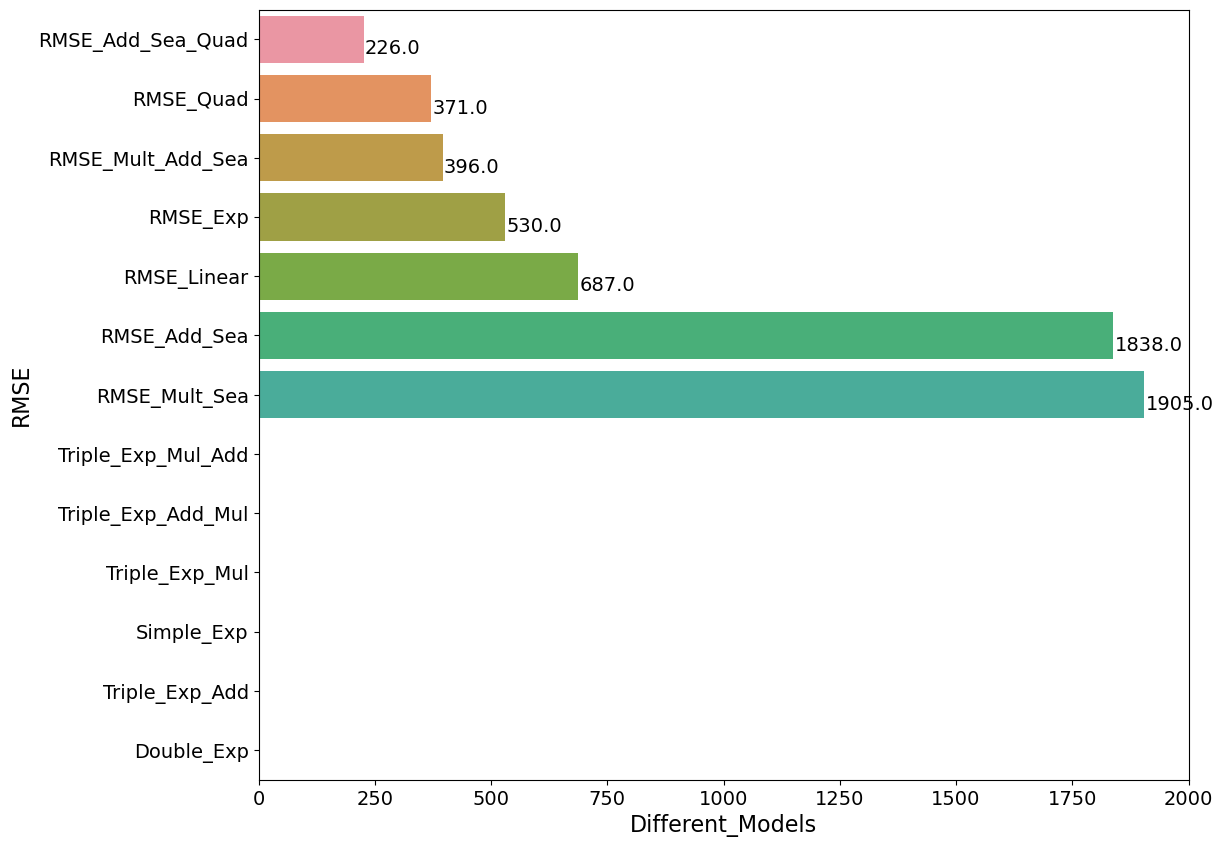

In [159]:
f, axe = plt.subplots(1,1, figsize=(12,10))
sns.barplot(x='RMSE_Values', y='Models', data=table_rmse, ax = axe)
axe.set_xlabel('Different_Models', size=16)
axe.set_ylabel('RMSE', size=16)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

for i, v in enumerate(np.round(table_rmse.RMSE_Values.values,0)):
    axe.text(v + 3, i + .25, str(v), fontsize= 14)

plt.show()


## Try different forecasting models that are suitable for your data and problem.Experiment with time series models (e.g.,ARIMA, SARIMA), machine learning models (e.g., Random Forest, Gradient Boosting), and deep learning models (e.g., LSTM, GRU) to find the one that performs best.


In [43]:
# Function to calculate MAE and RMSE
def evaluate_forecast(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return mae, rmse

In [44]:
# ARIMA model
def arima_forecast(train, test):
    history = train['Sales'].values.tolist()
    predictions = []
    for t in range(len(test)):
        model = ARIMA(history, order=(5,1,0))
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test['Sales'].iloc[t])
    mae, rmse = evaluate_forecast(test['Sales'].values, predictions)
    print('ARIMA - MAE: %.3f, RMSE: %.3f' % (mae, rmse))

In [45]:
# SARIMA model
def sarima_forecast(train, test):
    history = train['Sales'].values.tolist()
    predictions = []
    for t in range(len(test)):
        model = SARIMAX(history, order=(1, 1, 1), seasonal_order=(1, 1, 1, 4))
        model_fit = model.fit(disp=False)
        yhat = model_fit.forecast()
        predictions.append(yhat)
        history.append(test['Sales'].iloc[t])
    predictions = [p[0] for p in predictions]
    mae, rmse = evaluate_forecast(test['Sales'].values, predictions)
    print('SARIMA - MAE: %.3f, RMSE: %.3f' % (mae, rmse))

In [46]:
# Random Forest model
def random_forest_forecast(train, test):
    model = RandomForestRegressor(n_estimators=100)
    model.fit(train.index.values.reshape(-1,1), train['Sales'].values.ravel())
    predictions = model.predict(test.index.values.reshape(-1,1))
    mae, rmse = evaluate_forecast(test['Sales'].values, predictions)
    print('Random Forest - MAE: %.3f, RMSE: %.3f' % (mae, rmse))

In [47]:
# Gradient Boosting model
def gradient_boosting_forecast(train, test):
    model = GradientBoostingRegressor(n_estimators=100)
    model.fit(train.index.values.reshape(-1,1), train['Sales'].values.ravel())
    predictions = model.predict(test.index.values.reshape(-1,1))
    mae, rmse = evaluate_forecast(test['Sales'].values, predictions)
    print('Gradient Boosting - MAE: %.3f, RMSE: %.3f' % (mae, rmse))

In [69]:
# Load data
data=pd.read_excel("../Assignment 18-Forecasting/CocaCola_Sales_Rawdata.xlsx",
                    index_col=0, 
                    parse_dates=True)
data.head()

Sales
Quarter             
Q1_86    1734.827000
Q2_86    2244.960999
Q3_86    2533.804993
Q4_86    2154.962997
Q1_87    1547.818996

In [70]:
data.reset_index(inplace=True)

In [79]:
# Preprocess data
data['Quarter'] = data.index

In [80]:
sales_data = data['Sales']

In [81]:
# Split data into train and test sets
train_size = int(len(sales_data) * 0.8)
train, test = sales_data.iloc[:train_size], sales_data.iloc[train_size:]

In [82]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error  # Add this import
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense
from sklearn.preprocessing import MinMaxScaler

In [89]:
Train

Quarter        Sales quarter     Q1     Q2     Q3     Q4   t  t_square  \
0    Q1_86  1734.827000      Q1   True  False  False  False   1         1   
1    Q2_86  2244.960999      Q2  False   True  False  False   2         4   
2    Q3_86  2533.804993      Q3  False  False   True  False   3         9   
3    Q4_86  2154.962997      Q4  False  False  False   True   4        16   
4    Q1_87  1547.818996      Q1   True  False  False  False   5        25   
5    Q2_87  2104.411995      Q2  False   True  False  False   6        36   
6    Q3_87  2014.362999      Q3  False  False   True  False   7        49   
7    Q4_87  1991.746998      Q4  False  False  False   True   8        64   
8    Q1_88  1869.049999      Q1   True  False  False  False   9        81   
9    Q2_88  2313.631996      Q2  False   True  False  False  10       100   
10   Q3_88  2128.320000      Q3  False  False   True  False  11       121   
11   Q4_88  2026.828999      Q4  False  False  False   True  12       144   
12   Q1_89  1910.603996      Q1   True  False  False  False  13       169   
13   Q2_89  2331.164993      Q2  False   True  False  False  14       196   
14   Q3_89  2206.549995      Q3  False  False   True  False  15       225   
15   Q4_89  2173.967995      Q4  False  False  False   True  16       256   
16   Q1_90  2148.278000      Q1   True  False  False  False  17       289   
17   Q2_90  2739.307999      Q2  False   True  False  False  18       324   
18   Q3_90  2792.753998      Q3  False  False   True  False  19       361   
19   Q4_90  2556.009995      Q4  False  False  False   True  20       400   
20   Q1_91  2480.973999      Q1   True  False  False  False  21       441   
21   Q2_91  3039.522995      Q2  False   True  False  False  22       484   
22   Q3_91  3172.115997      Q3  False  False   True  False  23       529   
23   Q4_91  2879.000999      Q4  False  False  False   True  24       576   
24   Q1_92  2772.000000      Q1   True  False  False  False  25       625   

    log_Sales  
0    7.458663  
1    7.716443  
2    7.837477  
3    7.675529  
4    7.344602  
5    7.651791  
6    7.608058  
7    7.596767  
8    7.533186  
9    7.746574  
10   7.663088  
11   7.614228  
12   7.555175  
13   7.754123  
14   7.699185  
15   7.684309  
16   7.672422  
17   7.915461  
18   7.934783  
19   7.846203  
20   7.816407  
21   8.019456  
22   8.062154  
23   7.965199  
24   7.927324

In [91]:
# Run all models
print("Results:")
print("-------")
arima_forecast(Train, Test)
sarima_forecast(Train, Test)
random_forest_forecast(Train, Test)
gradient_boosting_forecast(Train, Test)

Results:
-------
ARIMA - MAE: 754.221, RMSE: 921.339
SARIMA - MAE: 981.695, RMSE: 1132.372
Random Forest - MAE: 1674.623, RMSE: 1745.023
Gradient Boosting - MAE: 1722.705, RMSE: 1791.217


In [92]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Extracting only the 'Sales' column for modeling
sales_data = data['Sales'].values.astype(float)

# Normalize the data
scaler = MinMaxScaler()
sales_data_scaled = scaler.fit_transform(sales_data.reshape(-1, 1))

# Define train and test sets
train_size = int(len(sales_data_scaled) * 0.8)
train, test = sales_data_scaled[:train_size], sales_data_scaled[train_size:]

# Reshape data for LSTM
def create_dataset(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

time_steps = 1
train_X, train_y = create_dataset(train, time_steps)
test_X, test_y = create_dataset(test, time_steps)

# Reshape input to be [samples, time steps, features]
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))

# Define LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Fit model
model.fit(train_X, train_y, epochs=50, batch_size=1, verbose=2)

# Make predictions
train_predict = model.predict(train_X)
test_predict = model.predict(test_X)

# Invert predictions
train_predict = scaler.inverse_transform(train_predict)
train_y = scaler.inverse_transform([train_y])
test_predict = scaler.inverse_transform(test_predict)
test_y = scaler.inverse_transform([test_y])

# Calculate root mean squared error
train_score = np.sqrt(np.mean((train_y[0] - train_predict[:, 0]) ** 2))
test_score = np.sqrt(np.mean((test_y[0] - test_predict[:, 0]) ** 2))
print('Train RMSE: %.2f' % (train_score))
print('Test RMSE: %.2f' % (test_score))


Epoch 1/50
32/32 - 4s - 124ms/step - loss: 0.0780
Epoch 2/50
32/32 - 0s - 3ms/step - loss: 0.0370
Epoch 3/50
32/32 - 0s - 2ms/step - loss: 0.0203
Epoch 4/50
32/32 - 0s - 2ms/step - loss: 0.0166
Epoch 5/50
32/32 - 0s - 2ms/step - loss: 0.0163
Epoch 6/50
32/32 - 0s - 2ms/step - loss: 0.0150
Epoch 7/50
32/32 - 0s - 2ms/step - loss: 0.0146
Epoch 8/50
32/32 - 0s - 2ms/step - loss: 0.0144
Epoch 9/50
32/32 - 0s - 2ms/step - loss: 0.0130
Epoch 10/50
32/32 - 0s - 2ms/step - loss: 0.0126
Epoch 11/50
32/32 - 0s - 2ms/step - loss: 0.0122
Epoch 12/50
32/32 - 0s - 2ms/step - loss: 0.0121
Epoch 13/50
32/32 - 0s - 2ms/step - loss: 0.0114
Epoch 14/50
32/32 - 0s - 2ms/step - loss: 0.0105
Epoch 15/50
32/32 - 0s - 2ms/step - loss: 0.0105
Epoch 16/50
32/32 - 0s - 2ms/step - loss: 0.0101
Epoch 17/50
32/32 - 0s - 2ms/step - loss: 0.0097
Epoch 18/50
32/32 - 0s - 2ms/step - loss: 0.0095
Epoch 19/50
32/32 - 0s - 2ms/step - loss: 0.0098
Epoch 20/50
32/32 - 0s - 2ms/step - loss: 0.0093
Epoch 21/50
32/32 - 0s - 2m

In [95]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import GRU, Dense


# Extracting only the 'Sales' column for modeling
sales_data = data['Sales'].values.astype(float)

# Normalize the data
scaler = MinMaxScaler()
sales_data_scaled = scaler.fit_transform(sales_data.reshape(-1, 1))

# Define train and test sets
train_size = int(len(sales_data_scaled) * 0.8)
train, test = sales_data_scaled[:train_size], sales_data_scaled[train_size:]

# Reshape data for GRU
def create_dataset(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

time_steps = 1
train_X, train_y = create_dataset(train, time_steps)
test_X, test_y = create_dataset(test, time_steps)

# Reshape input to be [samples, time steps, features]
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))

# Define GRU model
model = Sequential()
model.add(GRU(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Fit model
model.fit(train_X, train_y, epochs=50, batch_size=1, verbose=2)

# Make predictions
train_predict = model.predict(train_X)
test_predict = model.predict(test_X)

# Invert predictions
train_predict = scaler.inverse_transform(train_predict)
train_y = scaler.inverse_transform([train_y])
test_predict = scaler.inverse_transform(test_predict)
test_y = scaler.inverse_transform([test_y])

# Calculate root mean squared error
train_score = np.sqrt(np.mean((train_y[0] - train_predict[:, 0]) ** 2))
test_score = np.sqrt(np.mean((test_y[0] - test_predict[:, 0]) ** 2))
print('Train RMSE: %.2f' % (train_score))
print('Test RMSE: %.2f' % (test_score))

Epoch 1/50
32/32 - 1s - 43ms/step - loss: 0.0744
Epoch 2/50
32/32 - 0s - 2ms/step - loss: 0.0236
Epoch 3/50
32/32 - 0s - 2ms/step - loss: 0.0189
Epoch 4/50
32/32 - 0s - 2ms/step - loss: 0.0176
Epoch 5/50
32/32 - 0s - 2ms/step - loss: 0.0163
Epoch 6/50
32/32 - 0s - 2ms/step - loss: 0.0161
Epoch 7/50
32/32 - 0s - 2ms/step - loss: 0.0137
Epoch 8/50
32/32 - 0s - 2ms/step - loss: 0.0128
Epoch 9/50
32/32 - 0s - 2ms/step - loss: 0.0118
Epoch 10/50
32/32 - 0s - 2ms/step - loss: 0.0108
Epoch 11/50
32/32 - 0s - 2ms/step - loss: 0.0101
Epoch 12/50
32/32 - 0s - 2ms/step - loss: 0.0100
Epoch 13/50
32/32 - 0s - 2ms/step - loss: 0.0094
Epoch 14/50
32/32 - 0s - 2ms/step - loss: 0.0092
Epoch 15/50
32/32 - 0s - 2ms/step - loss: 0.0090
Epoch 16/50
32/32 - 0s - 2ms/step - loss: 0.0092
Epoch 17/50
32/32 - 0s - 2ms/step - loss: 0.0086
Epoch 18/50
32/32 - 0s - 2ms/step - loss: 0.0091
Epoch 19/50
32/32 - 0s - 2ms/step - loss: 0.0086
Epoch 20/50
32/32 - 0s - 2ms/step - loss: 0.0086
Epoch 21/50
32/32 - 0s - 2ms